In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

# 마포구

## EDA

In [87]:
data = pd.read_csv('C:/Users/tpdus/OneDrive/바탕 화면/팀프로젝트/데이터마이닝/진짜완료데이터/마포구_동별로.csv',encoding='cp949')
data

,법정동,견인수,pc방수,카페수,따릉이대여소수,기숙사고시원수,독서실수,약국수,편의점수,숙박업,...,병원수,부동산수,양식집,한식집,중식,일식,음식점전체수,동물병원수,아파트수,버스정류장수
0,공덕동,403,1,66,81,5,3,17,22,4,...,22,85,12,180,12,22,352,3,17,22
1,구수동,23,0,4,0,0,0,0,2,0,...,3,6,0,16,1,0,34,2,1,5
2,노고산동,47,2,45,60,19,2,10,19,26,...,30,49,8,65,9,5,154,3,2,15
3,당인동,32,1,4,10,0,0,0,2,1,...,0,2,0,2,9,0,8,0,0,1
4,대흥동,216,0,46,56,7,5,15,14,3,...,10,69,13,74,26,10,185,1,8,23
5,도화동,272,1,69,36,1,2,16,27,11,...,27,66,16,169,26,30,442,2,13,37
6,동교동,1039,3,134,72,5,5,15,29,83,...,46,74,45,136,26,38,467,2,1,15
7,마포동,79,0,6,10,0,0,1,6,3,...,1,9,2,11,1,1,27,0,4,2
8,망원동,537,7,200,62,1,3,18,45,5,...,19,102,62,201,22,33,573,5,49,53
9,상수동,274,1,160,45,4,2,5,13,3,...,1,37,35,70,11,28,174,1,4,18


In [88]:
#feature 만 확인
동이름 = data['법정동']
data = data.drop('법정동', axis=1)
data

,견인수,pc방수,카페수,따릉이대여소수,기숙사고시원수,독서실수,약국수,편의점수,숙박업,학원수,병원수,부동산수,양식집,한식집,중식,일식,음식점전체수,동물병원수,아파트수,버스정류장수
0,403,1,66,81,5,3,17,22,4,67,22,85,12,180,12,22,352,3,17,22
1,23,0,4,0,0,0,0,2,0,8,3,6,0,16,1,0,34,2,1,5
2,47,2,45,60,19,2,10,19,26,57,30,49,8,65,9,5,154,3,2,15
3,32,1,4,10,0,0,0,2,1,3,0,2,0,2,9,0,8,0,0,1
4,216,0,46,56,7,5,15,14,3,104,10,69,13,74,26,10,185,1,8,23
5,272,1,69,36,1,2,16,27,11,90,27,66,16,169,26,30,442,2,13,37
6,1039,3,134,72,5,5,15,29,83,165,46,74,45,136,26,38,467,2,1,15
7,79,0,6,10,0,0,1,6,3,9,1,9,2,11,1,1,27,0,4,2
8,537,7,200,62,1,3,18,45,5,119,19,102,62,201,22,33,573,5,49,53
9,274,1,160,45,4,2,5,13,3,34,1,37,35,70,11,28,174,1,4,18


In [89]:
print('feature: ', data.columns)
print('feature개수:', len(data.columns))

feature:  Index(['견인수', 'pc방수', '카페수', '따릉이대여소수', '기숙사고시원수', '독서실수', '약국수', '편의점수',
       '숙박업', '학원수', '병원수', '부동산수', '양식집', '한식집', '중식', '일식', '음식점전체수',
       '동물병원수', '아파트수', '버스정류장수'],
      dtype='object')
feature개수: 20


In [90]:
print('instance 수:', len(data))

instance 수: 26


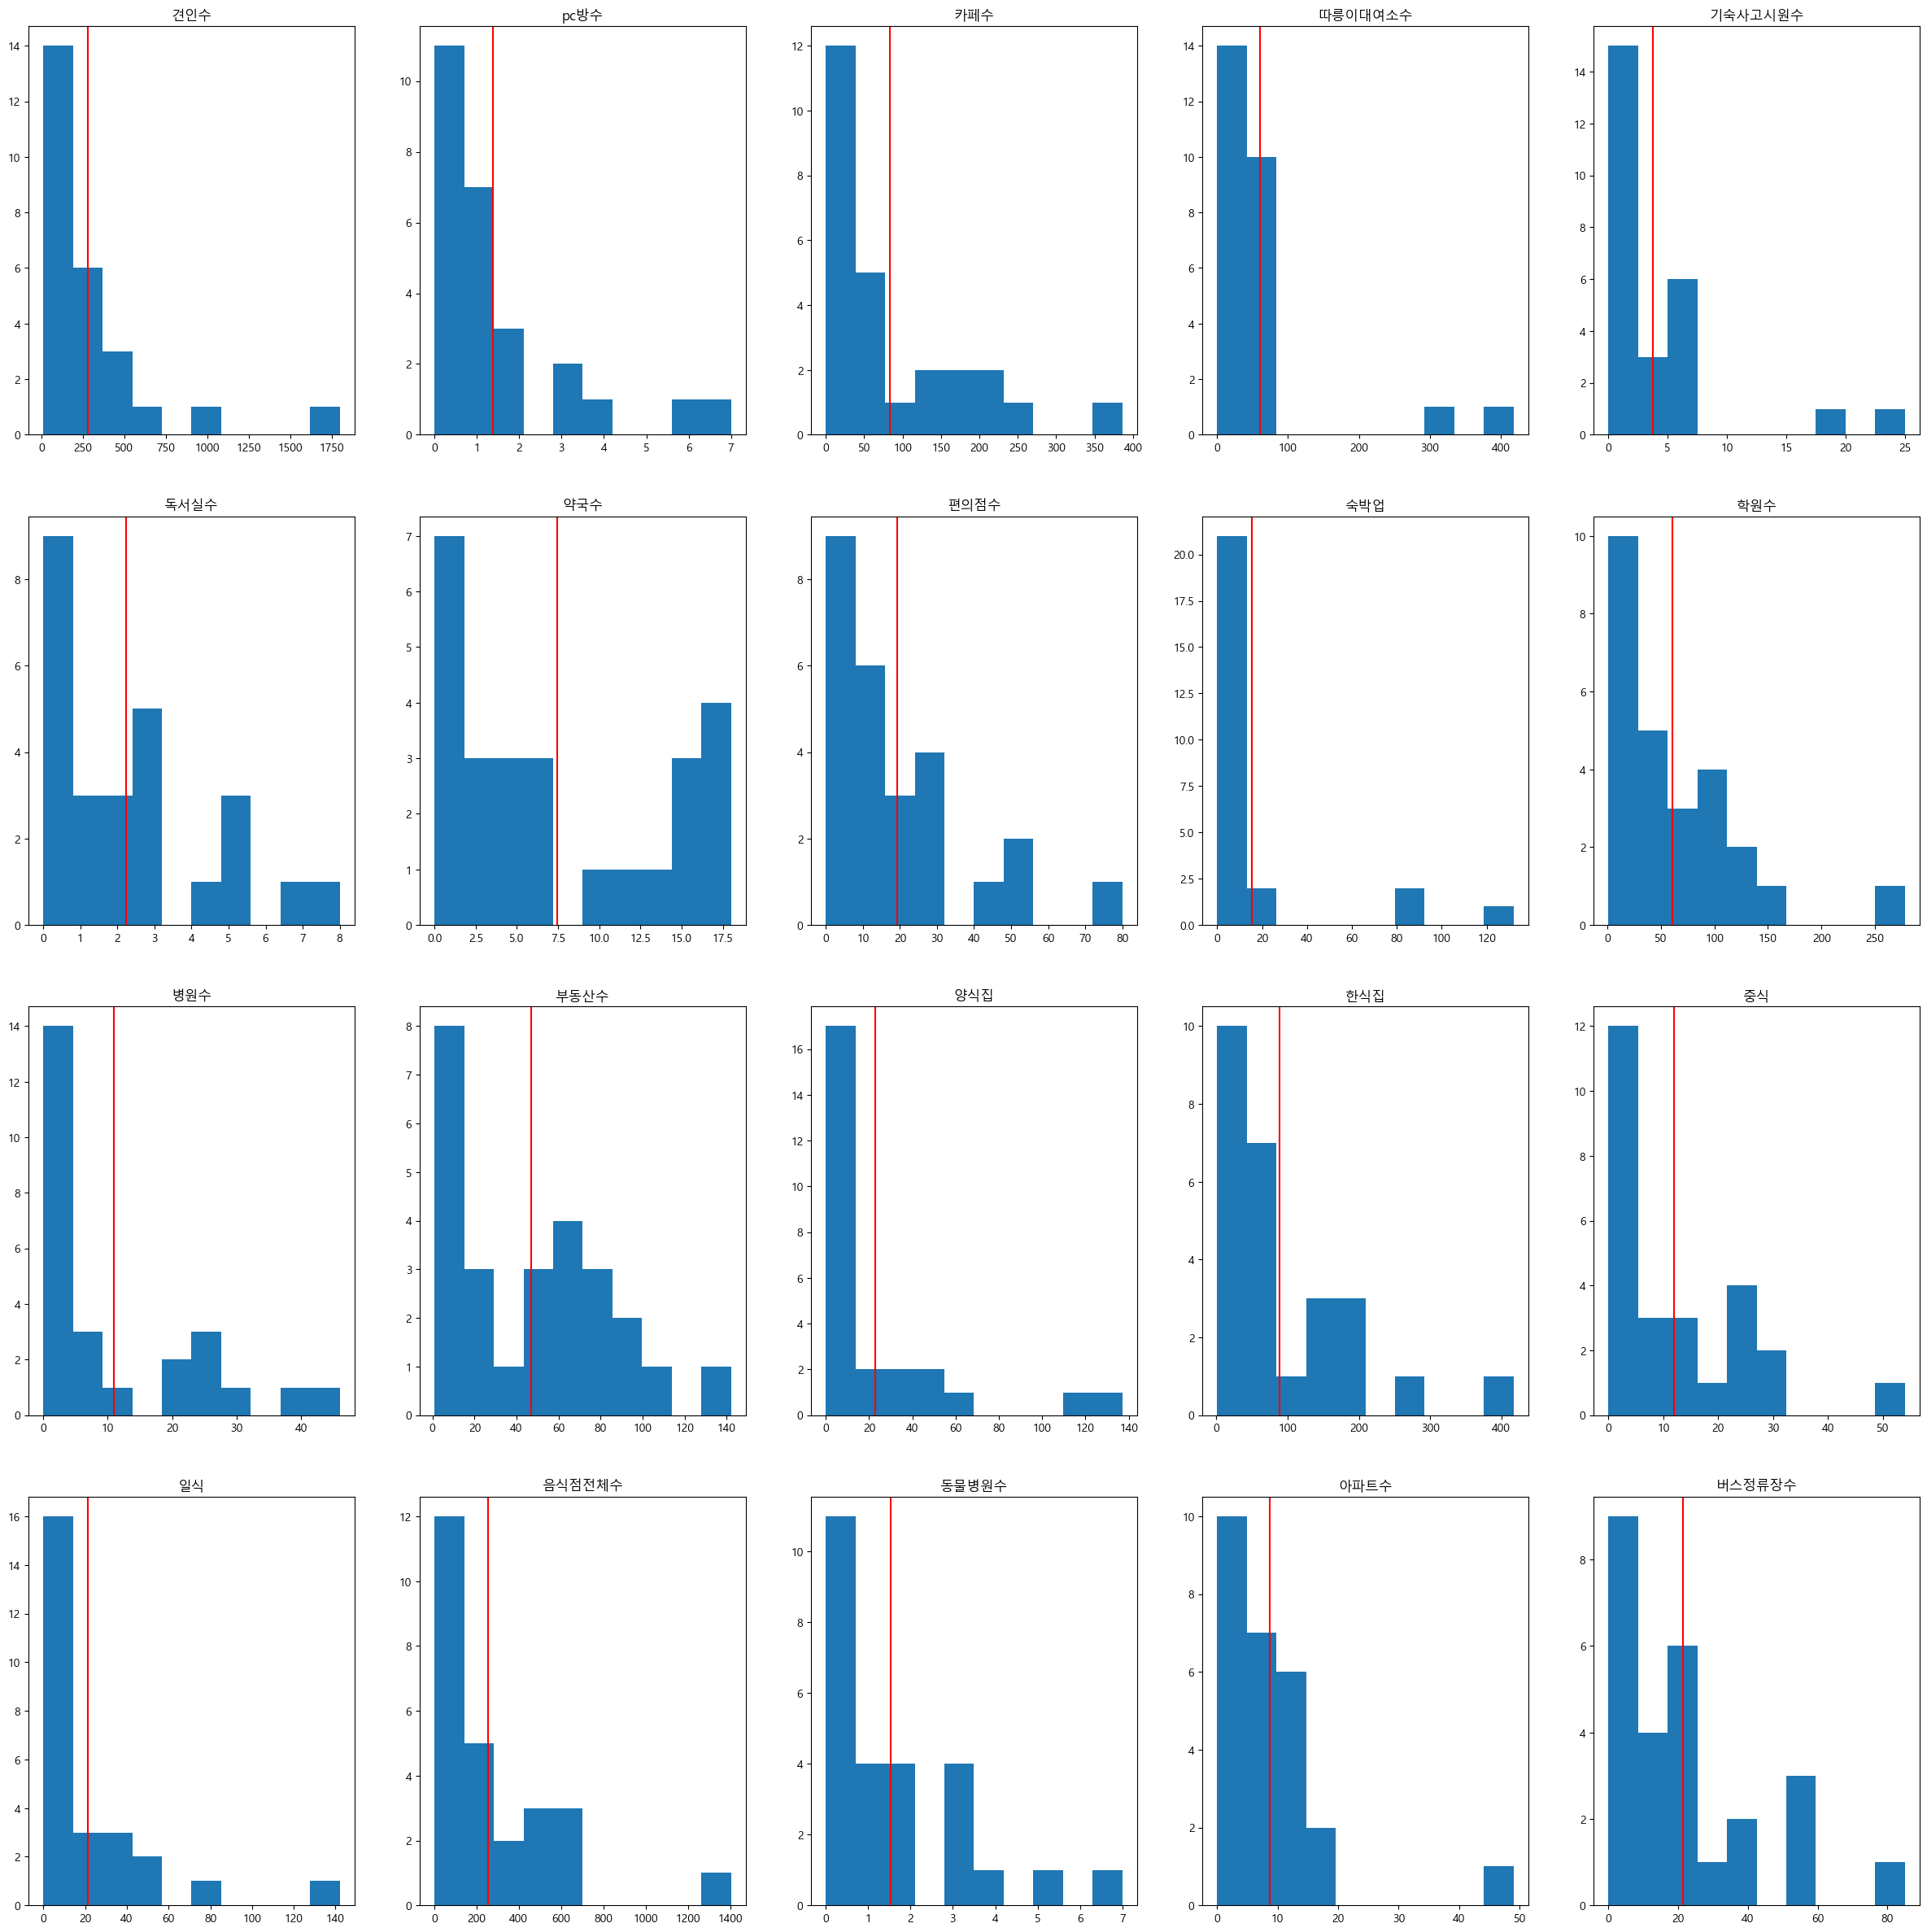

In [91]:
#feature 에 대한 데이터 분포확인
plt.figure(figsize=(30,30))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.hist(data[data.columns[i-1]])
    plt.title('{}'.format(data.columns[i-1]))
    plt.axvline(data[data.columns[i-1]].mean(),color='red')

plt.show()

In [92]:
#feature에 대한 통계량 확인
data.iloc[:,:20].describe()

,견인수,pc방수,카페수,따릉이대여소수,기숙사고시원수,독서실수,약국수,편의점수,숙박업,학원수,병원수,부동산수,양식집,한식집,중식,일식,음식점전체수,동물병원수,아파트수,버스정류장수
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.00000,26.000000,26.00000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,279.423077,1.384615,83.192308,60.269231,3.769231,2.230769,7.461538,19.192308,15.615385,60.576923,10.961538,47.115385,23.00000,88.653846,12.00000,21.230769,255.076923,1.538462,8.730769,21.423077
std,386.436145,1.877806,96.985368,93.863969,5.908013,2.320477,6.616529,19.170851,32.664448,63.215298,13.364074,38.071855,35.87088,97.893796,13.49963,31.404850,310.599024,1.838059,9.730602,21.232377
min,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,46.250000,0.000000,9.500000,10.000000,0.000000,0.000000,1.250000,6.250000,0.250000,10.500000,1.000000,9.500000,1.25000,12.250000,1.50000,1.000000,35.750000,0.000000,2.250000,5.750000
50%,167.500000,1.000000,45.500000,38.000000,1.500000,2.000000,5.500000,14.000000,3.000000,49.500000,4.000000,49.000000,9.50000,66.500000,8.00000,9.000000,147.000000,1.000000,7.500000,16.500000
75%,290.250000,2.000000,132.000000,65.750000,5.000000,3.000000,14.500000,27.750000,10.000000,96.000000,21.250000,72.500000,31.00000,136.000000,20.75000,29.500000,423.000000,2.750000,11.750000,26.000000
max,1798.000000,7.000000,386.000000,418.000000,25.000000,8.000000,18.000000,80.000000,132.000000,278.000000,46.000000,142.000000,137.00000,417.000000,54.00000,142.000000,1404.000000,7.000000,49.000000,85.000000


In [93]:
# 결측치 확인
data.isnull().sum()

견인수        0
pc방수       0
카페수        0
따릉이대여소수    0
기숙사고시원수    0
독서실수       0
약국수        0
편의점수       0
숙박업        0
학원수        0
병원수        0
부동산수       0
양식집        0
한식집        0
중식         0
일식         0
음식점전체수     0
동물병원수      0
아파트수       0
버스정류장수     0
dtype: int64

In [94]:
# 데이터 유형 확인 
data.dtypes

견인수        int64
pc방수       int64
카페수        int64
따릉이대여소수    int64
기숙사고시원수    int64
독서실수       int64
약국수        int64
편의점수       int64
숙박업        int64
학원수        int64
병원수        int64
부동산수       int64
양식집        int64
한식집        int64
중식         int64
일식         int64
음식점전체수     int64
동물병원수      int64
아파트수       int64
버스정류장수     int64
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '견인수'),
  Text(1, 0, 'pc방수'),
  Text(2, 0, '카페수'),
  Text(3, 0, '따릉이대여소수'),
  Text(4, 0, '기숙사고시원수'),
  Text(5, 0, '독서실수'),
  Text(6, 0, '약국수'),
  Text(7, 0, '편의점수'),
  Text(8, 0, '숙박업'),
  Text(9, 0, '학원수'),
  Text(10, 0, '병원수'),
  Text(11, 0, '부동산수'),
  Text(12, 0, '양식집'),
  Text(13, 0, '한식집'),
  Text(14, 0, '중식'),
  Text(15, 0, '일식'),
  Text(16, 0, '음식점전체수'),
  Text(17, 0, '동물병원수'),
  Text(18, 0, '아파트수'),
  Text(19, 0, '버스정류장수')])

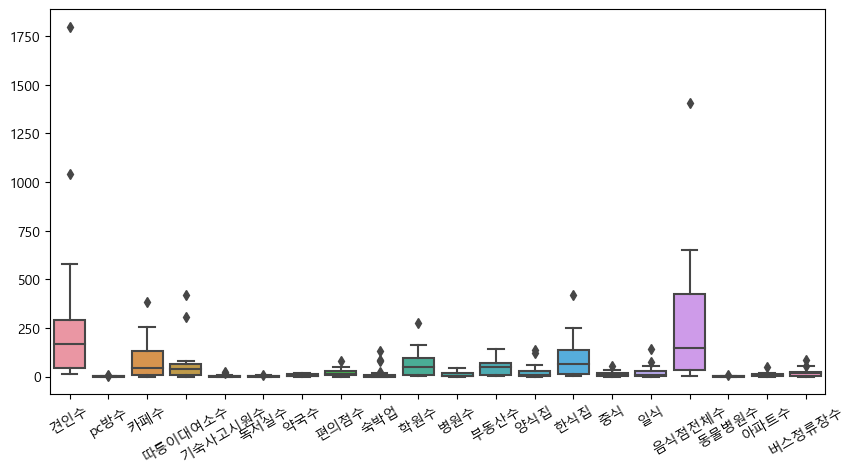

In [95]:
# 모든 feature를 보여주는 boxplot
plt.figure(figsize = (10,5))
sns.boxplot(data = data)
plt.xticks(rotation=30)

<AxesSubplot:>

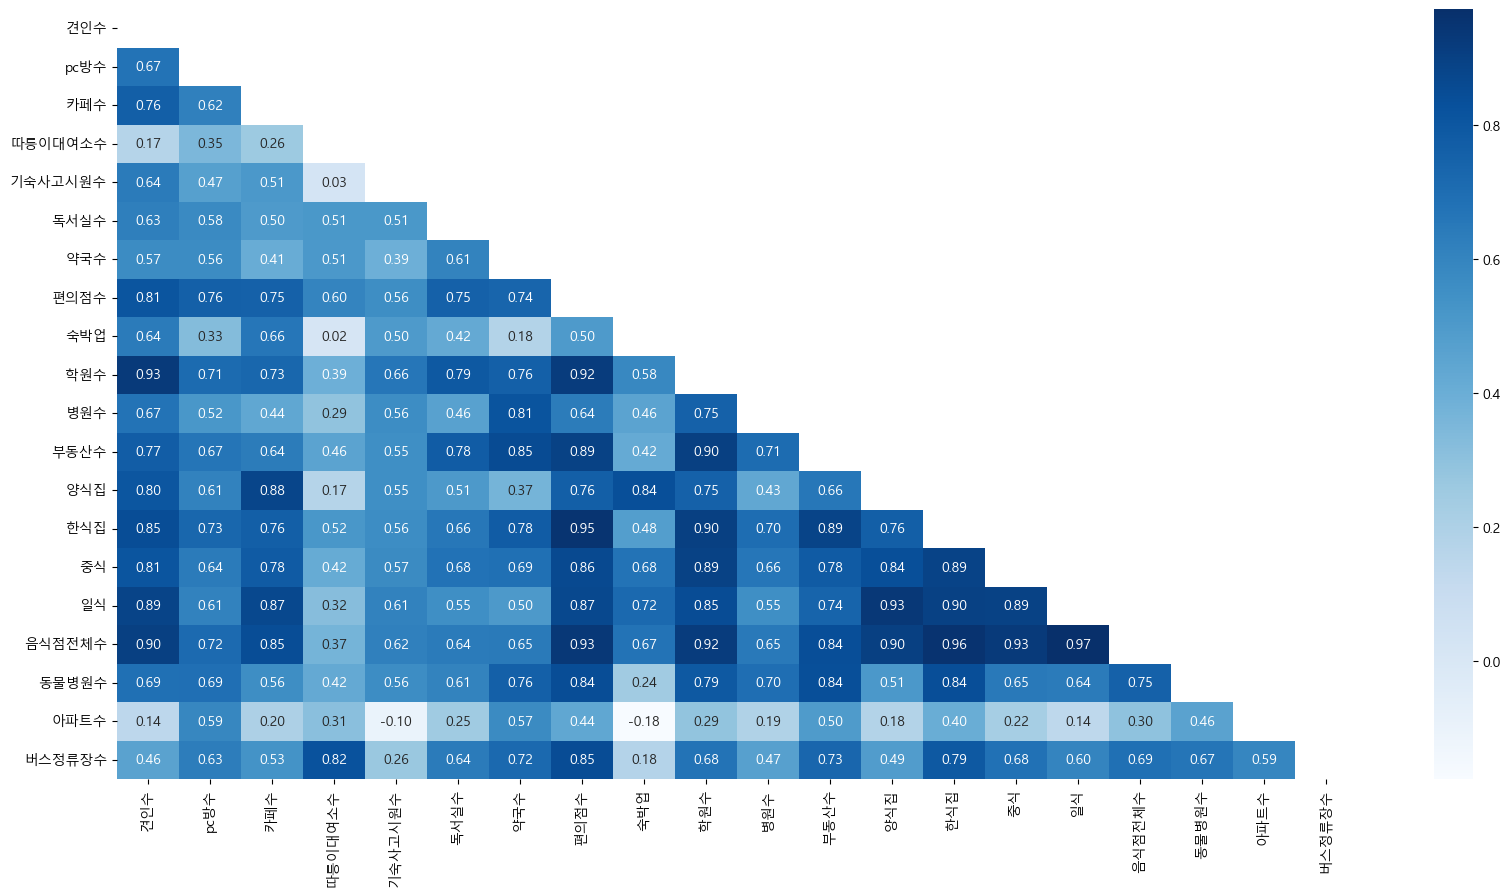

In [96]:
#상관관계 확인
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = data.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Blues')

상관계수0.6 이하는 삭제하였습니다.
삭제한 변수 : 버스정류장수, 아파트수, 약국수, 따릉이대여소수 

In [97]:
#변수삭제
columns_to_drop=['버스정류장수','아파트수','약국수','따릉이대여소수']
data=data.drop(columns_to_drop, axis=1)

<AxesSubplot:>

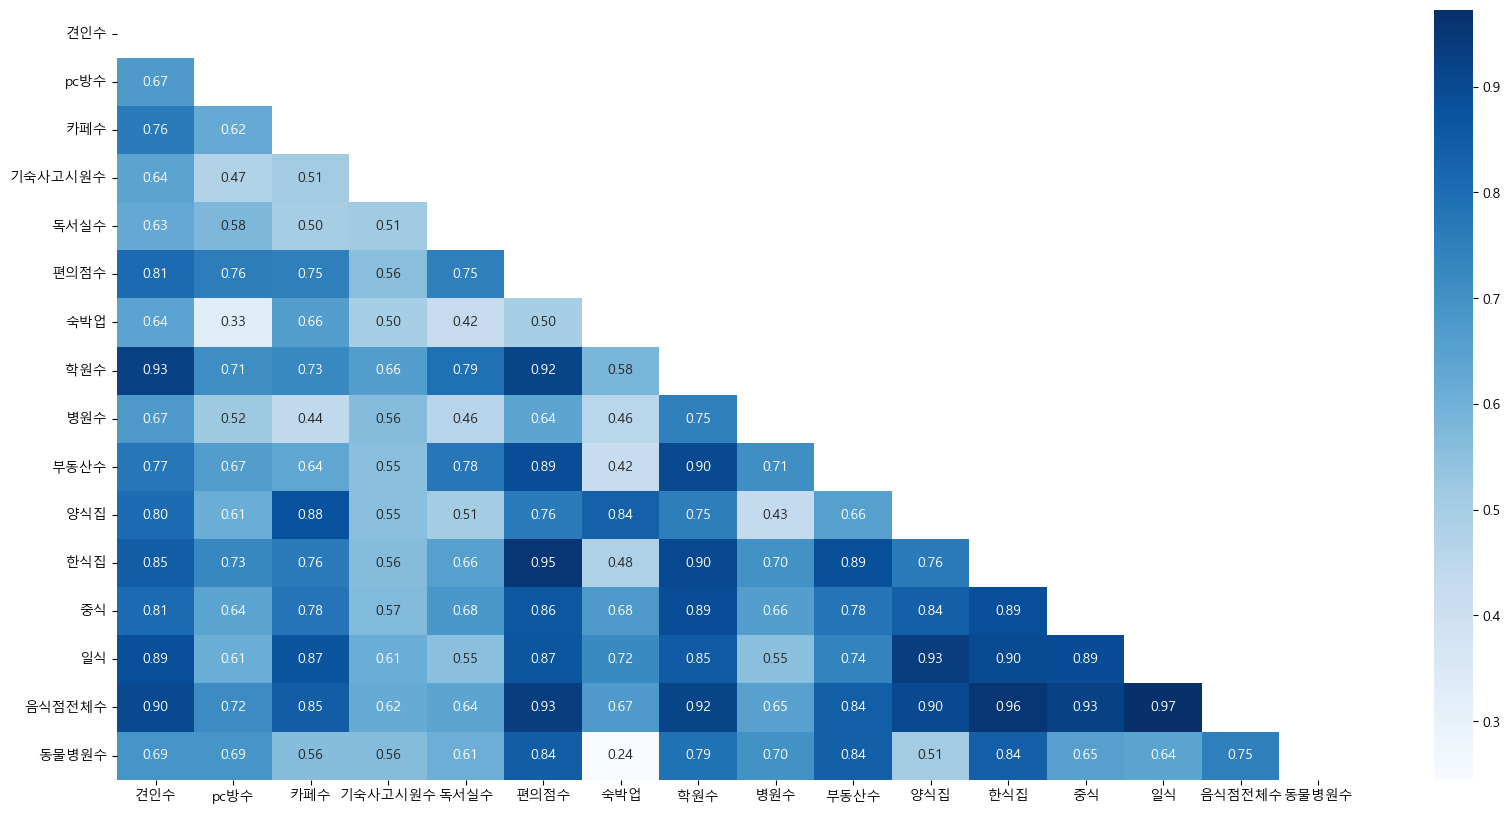

In [98]:
# 변수 삭제 후 상관관계 확인하기
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = data.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Blues')


In [99]:
#스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-means

In [100]:
kmeans = KMeans(n_clusters=5, random_state=0)  #n_clusters 는 임의로 정함.
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=0)

In [101]:
assignments_X_train_scaled = kmeans.labels_
print(assignments_X_train_scaled)

[2 1 3 1 3 2 2 1 2 3 2 4 2 1 3 1 3 0 3 1 1 3 1 1 2 1]


In [102]:
#클러스터 중심점들의 실제 값을 확인하기 위함.
print(scaler.inverse_transform(kmeans.cluster_centers_))

[[3.74000000e+02 1.00000000e+00 2.57000000e+02 5.00000000e+00
  3.00000000e+00 2.80000000e+01 1.32000000e+02 7.00000000e+01
  6.00000000e+00 5.40000000e+01 1.22000000e+02 1.23000000e+02
  3.20000000e+01 7.30000000e+01 6.50000000e+02 0.00000000e+00]
 [4.86000000e+01 3.00000000e-01 2.66000000e+01 3.00000000e-01
  1.00000000e-01 3.70000000e+00 5.00000000e-01 8.00000000e+00
  1.10000000e+00 9.00000000e+00 1.30000000e+00 1.33000000e+01
  1.90000000e+00 1.80000000e+00 3.13000000e+01 3.00000000e-01]
 [4.86857143e+02 2.57142857e+00 1.21428571e+02 2.57142857e+00
  3.57142857e+00 3.57142857e+01 1.95714286e+01 1.07857143e+02
  2.18571429e+01 8.27142857e+01 3.42857143e+01 1.74714286e+02
  2.05714286e+01 3.54285714e+01 4.59714286e+02 2.85714286e+00]
 [1.71285714e+02 1.14285714e+00 5.77142857e+01 6.71428571e+00
  3.14285714e+00 1.48571429e+01 6.71428571e+00 5.60000000e+01
  1.11428571e+01 5.14285714e+01 1.22857143e+01 5.84285714e+01
  9.00000000e+00 1.01428571e+01 1.49571429e+02 1.42857143e+00]
 [1.

In [103]:
#하이퍼파라미터  조정해주는 과정입니다.
sil_scores = []
inertia = []
best_score=0
algorithm=['elkan','auto','full']
best_params={}
inertia1 = []
for algo in algorithm: #2에서 9ㄲㅏ지
    sil_scores_n = []
   
    for n_clusters in range(2,10):
        kmeans = KMeans(n_clusters=n_clusters, algorithm= algo, random_state=0)
        cluster_labels = kmeans.fit_predict(scaled_data)
        score = silhouette_score(scaled_data, cluster_labels)
        sil_scores_n.append(score)
        
        
        
        if score > best_score:
            best_score = score
            best_params = {'n_cluster': n_clusters, '알고리즘': algo}
    sil_scores.append(sil_scores_n)
    inertia.append(kmeans.inertia_)
        

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)


print("sil_scores:",sil_scores)

C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

Best Silhouette Score: 0.4553689511360932
Best Parameters: {'n_cluster': 2, '알고리즘': 'elkan'}
sil_scores: [[0.4553689511360932, 0.3838154785042866, 0.3263624677965708, 0.29817176627859476, 0.2818402015558141, 0.28273300119479344, 0.2988333882881843, 0.29233306475864806], [0.4553689511360932, 0.3838154785042866, 0.3263624677965708, 0.29817176627859476, 0.2818402015558141, 0.28273300119479344, 0.2988333882881843, 0.29233306475864806], [0.4553689511360932, 0.3838154785042866, 0.3263624677965708, 0.29817176627859476, 0.2818402015558141, 0.28273300119479344, 0.2988333882881843, 0.29233306475864806]]


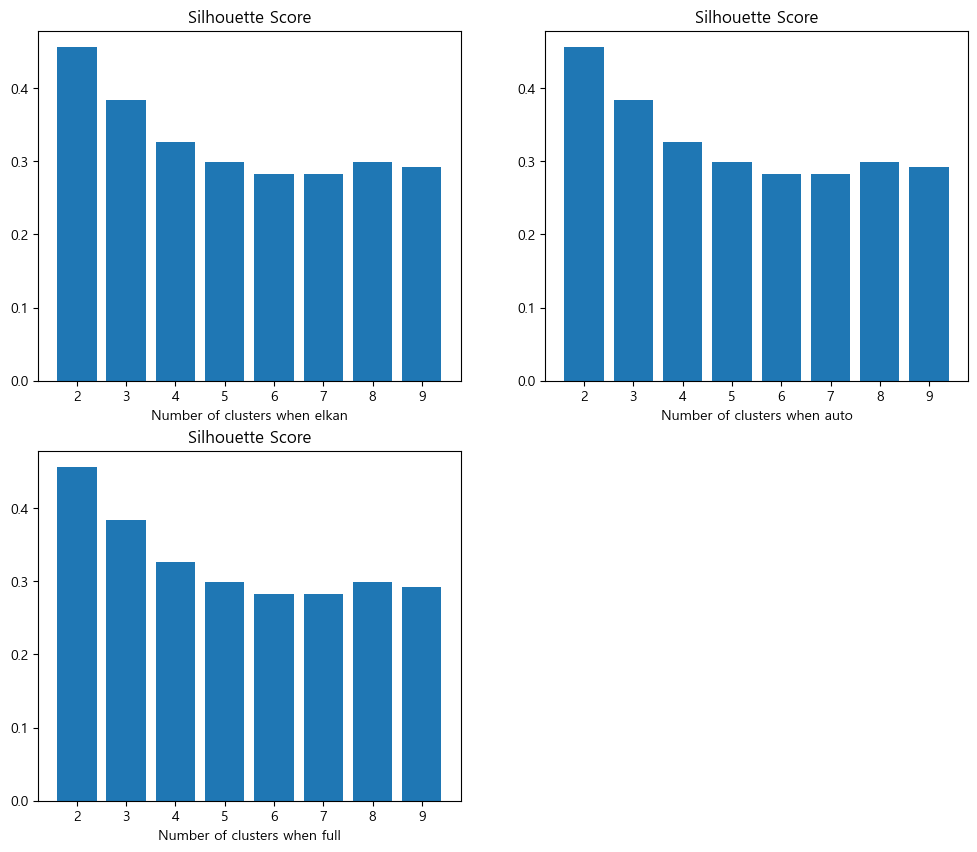

In [104]:
plt.figure(figsize=(12,10))
for n in range(0,len(algorithm)):
    plt.subplot(2,2, n+1)
    plt.bar(range(2,10), sil_scores[n], )
    plt.xlabel("Number of clusters when "+algorithm[n])
    plt.title("Silhouette Score")
plt.show()

C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'K-Means Inertia')

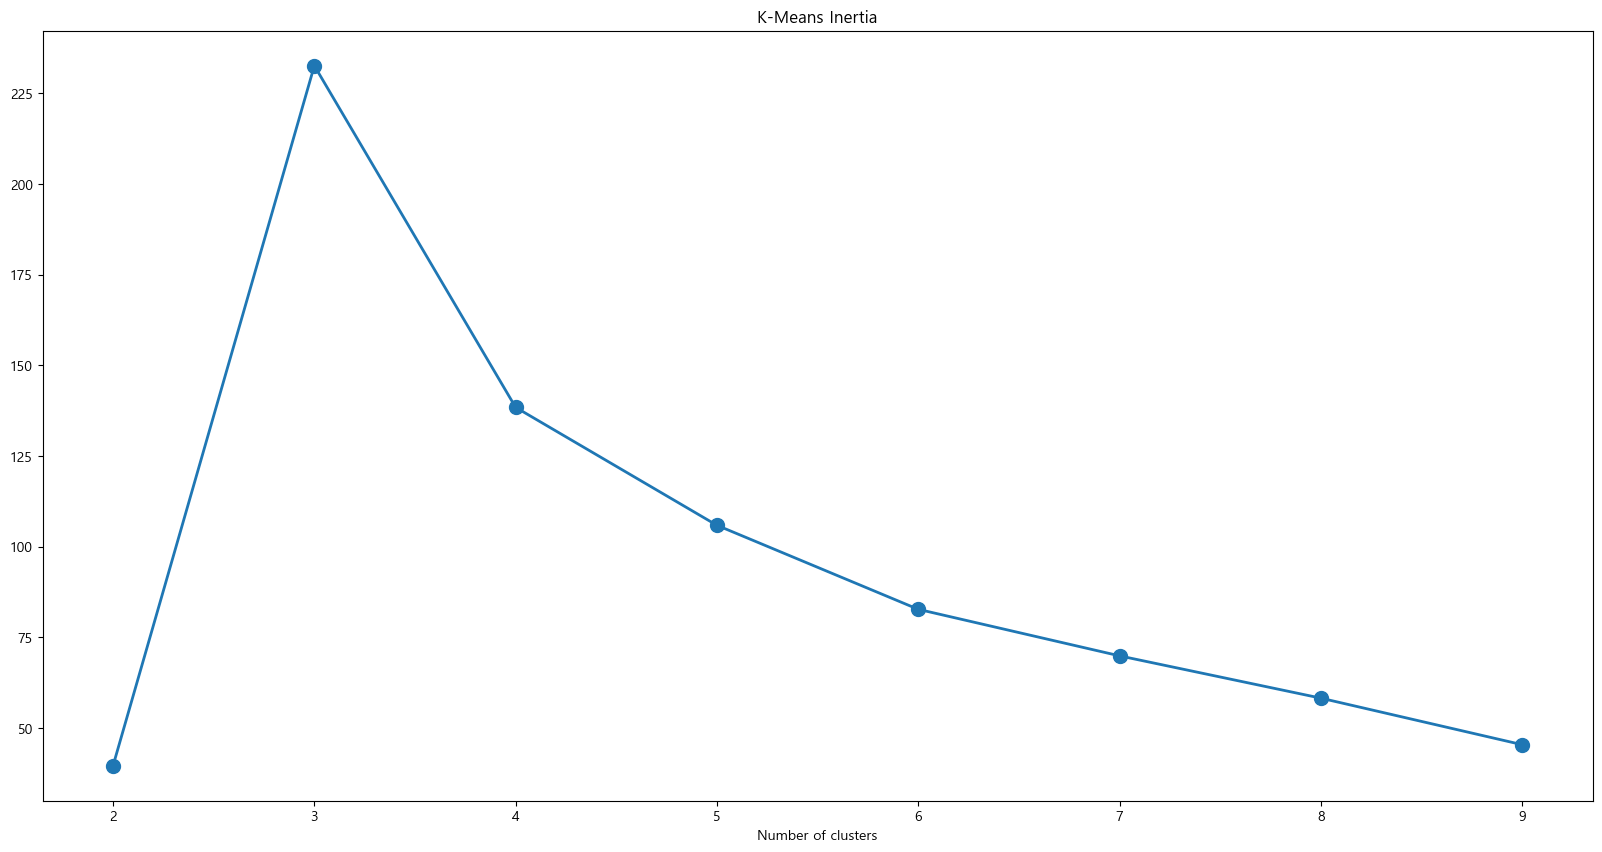

In [105]:
inertia1=[]
algorithm=['elkan','auto','full']
for n_clusters in range(2,10):
    inertia1.append(kmeans.inertia_)
   
    for algo in algorithm:
        kmeans = KMeans(n_clusters=n_clusters, algorithm= algo, random_state=0)
        cluster_labels = kmeans.fit_predict(scaled_data)
        score = silhouette_score(scaled_data, cluster_labels)
plt.plot(range(2,10), inertia1, marker='o', lw=2, ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia")

In [106]:
#종합적으로 결과를 참고하였을때 n_cluster=3, algorithm=elkan 을사용하기로 했습니다.
kmeans = KMeans(n_clusters=4, algorithm= 'elkan', random_state=0)
kmeans.fit(scaled_data)


KMeans(algorithm='elkan', n_clusters=4, random_state=0)

In [107]:
cluster_labels = kmeans.fit_predict(scaled_data)

# 각 행의 클러스터 레이블 출력
for i, label in enumerate(cluster_labels):
    print("행", i+1, "은(는) 클러스터", label+1, "에 속합니다.")

행 1 은(는) 클러스터 1 에 속합니다.
행 2 은(는) 클러스터 2 에 속합니다.
행 3 은(는) 클러스터 1 에 속합니다.
행 4 은(는) 클러스터 2 에 속합니다.
행 5 은(는) 클러스터 1 에 속합니다.
행 6 은(는) 클러스터 1 에 속합니다.
행 7 은(는) 클러스터 4 에 속합니다.
행 8 은(는) 클러스터 2 에 속합니다.
행 9 은(는) 클러스터 4 에 속합니다.
행 10 은(는) 클러스터 1 에 속합니다.
행 11 은(는) 클러스터 4 에 속합니다.
행 12 은(는) 클러스터 3 에 속합니다.
행 13 은(는) 클러스터 1 에 속합니다.
행 14 은(는) 클러스터 2 에 속합니다.
행 15 은(는) 클러스터 1 에 속합니다.
행 16 은(는) 클러스터 2 에 속합니다.
행 17 은(는) 클러스터 1 에 속합니다.
행 18 은(는) 클러스터 4 에 속합니다.
행 19 은(는) 클러스터 1 에 속합니다.
행 20 은(는) 클러스터 2 에 속합니다.
행 21 은(는) 클러스터 2 에 속합니다.
행 22 은(는) 클러스터 2 에 속합니다.
행 23 은(는) 클러스터 2 에 속합니다.
행 24 은(는) 클러스터 2 에 속합니다.
행 25 은(는) 클러스터 1 에 속합니다.
행 26 은(는) 클러스터 2 에 속합니다.


In [108]:
data_features= data.columns
data_with_labels = pd.DataFrame(data, columns=data_features)
data_with_labels['Cluster'] = cluster_labels

cluster_features = data_with_labels.groupby('Cluster')[data_features].mean()

# 클러스터별 특징 출력
for cluster_id, features in cluster_features.iterrows():
   
    print(f"Cluster {cluster_id+1}:")
    for feature, value in features.iteritems():
       
        print(f"- {feature}: {value}")
    cluster_id += 1 
    print()

    

Cluster 1:
- 견인수: 264.5
- pc방수: 1.2
- 카페수: 72.7
- 기숙사고시원수: 5.3
- 독서실수: 3.3
- 편의점수: 21.6
- 숙박업: 8.7
- 학원수: 72.0
- 병원수: 14.0
- 부동산수: 67.0
- 양식집: 17.3
- 한식집: 101.6
- 중식: 12.6
- 일식: 18.8
- 음식점전체수: 254.9
- 동물병원수: 2.0

Cluster 2:
- 견인수: 53.09090909090909
- pc방수: 0.36363636363636365
- 카페수: 27.272727272727273
- 기숙사고시원수: 0.8181818181818182
- 독서실수: 0.36363636363636365
- 편의점수: 4.7272727272727275
- 숙박업: 1.0909090909090908
- 학원수: 11.363636363636363
- 병원수: 1.1818181818181819
- 부동산수: 10.181818181818182
- 양식집: 2.1818181818181817
- 한식집: 14.636363636363637
- 중식: 2.0
- 일식: 2.090909090909091
- 음식점전체수: 38.09090909090909
- 동물병원수: 0.2727272727272727

Cluster 3:
- 견인수: 1798.0
- pc방수: 6.0
- 카페수: 386.0
- 기숙사고시원수: 25.0
- 독서실수: 7.0
- 편의점수: 80.0
- 숙박업: 85.0
- 학원수: 278.0
- 병원수: 37.0
- 부동산수: 142.0
- 양식집: 137.0
- 한식집: 417.0
- 중식: 54.0
- 일식: 142.0
- 음식점전체수: 1404.0
- 동물병원수: 7.0

Cluster 4:
- 견인수: 559.5
- pc방수: 3.5
- 카페수: 187.5
- 기숙사고시원수: 2.75
- 독서실수: 3.5
- 편의점수: 37.75
- 숙박업: 55.5
- 학원수: 113.0
- 병원수: 23.75
- 부동산수: 75.25

Index(['견인수', 'pc방수', '카페수', '기숙사고시원수', '독서실수', '편의점수', '숙박업', '학원수', '병원수',
       '부동산수', '양식집', '한식집', '중식', '일식', '음식점전체수', '동물병원수', 'Cluster'],
      dtype='object')


C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


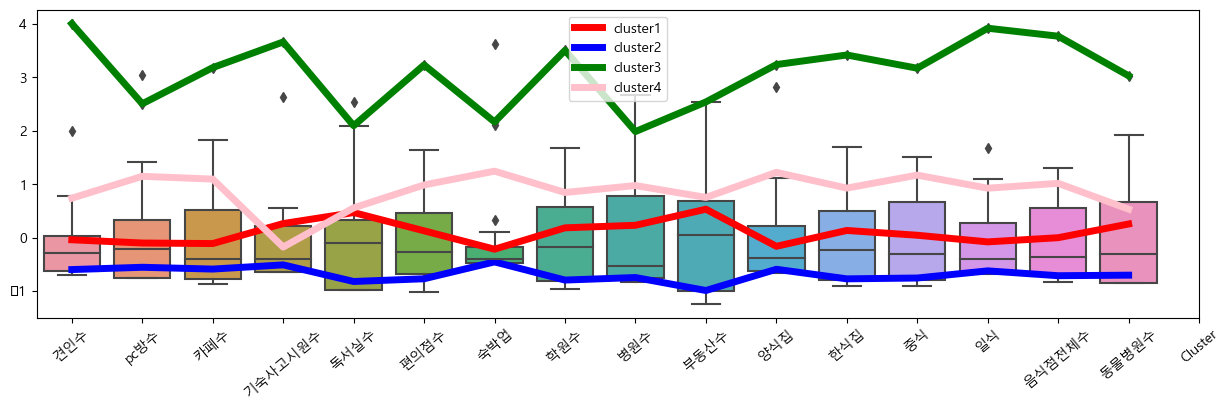

In [109]:
plt.figure(figsize = (15,4))
sns.boxplot(data = scaled_data)
pd.Series(kmeans.cluster_centers_[0]).plot(color = 'red',linewidth='5',label = 'cluster1')
pd.Series(kmeans.cluster_centers_[1]).plot(color = 'blue',linewidth='5',label = 'cluster2')
pd.Series(kmeans.cluster_centers_[2]).plot(color = 'green',linewidth='5',label = 'cluster3')
pd.Series(kmeans.cluster_centers_[3]).plot(color = 'pink',linewidth='5',label = 'cluster4')



feature_names=data.columns
print(feature_names)

plt.xticks(np.arange(0, len(feature_names)),feature_names,rotation = 40)
plt.legend(loc = 'upper center')




plt.show()

### 결론

각 cluster의 특징은 다음과 같다.

1. cluster1 : 독서실, 기숙사,고시원이 많은 지역
2. cluster2 : 특징이 없음. 
3. cluster3 : 일식집, 편의점이 많은 지역
4. cluster4 : 숙박업, 양식집이 많은 지역


# agglomerative

In [110]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(data)
agg = AgglomerativeClustering(n_clusters=3) 
agg.fit(scaled_data)

AgglomerativeClustering(n_clusters=3)

In [111]:
assignments_X_train = agg.labels_
print(assignments_X_train)

[0 0 0 0 0 0 1 0 1 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [112]:
linkage = ['ward', 'complete', 'average', 'single']
sil_scores = []
sil_scores_linkage = []

best_score=0
best_parmas={}
for link in linkage:
    sil_scores_n = []
    for n_cluster in range(2,10):
        agg = AgglomerativeClustering(n_clusters=n_cluster, linkage=link)
        cluster_labels = agg.fit_predict(scaled_data)
        score=silhouette_score(scaled_data, cluster_labels)
        sil_scores_n.append(score)
        
        
        if score > best_score:
            best_score=score
            best_params={'n_cluster':n_cluster, 'linkage':link}
    sil_scores.append(sil_scores_n)
    sil_scores_linkage.append(sil_scores)
   
print('best score:',best_score)
print(best_params)
print("sil_scores:", sil_scores)
print("sil_scores_linkage",sil_scores)

best score: 0.6318410936964148
{'n_cluster': 2, 'linkage': 'complete'}
sil_scores: [[0.49629280849376217, 0.4411336277007581, 0.3297614491736515, 0.3287513456742172, 0.28201905262713384, 0.28128839059796246, 0.2869755279800871, 0.2904053174572854], [0.6318410936964148, 0.4411336277007581, 0.36997114734185854, 0.370370628917784, 0.3333510368139728, 0.338495213264956, 0.3293755055116433, 0.32427868597588916], [0.6318410936964148, 0.4249333827981685, 0.4011545610076085, 0.30000810023260244, 0.30515227668358563, 0.338495213264956, 0.33138816479265676, 0.3192189744001909], [0.6318410936964148, 0.3938384982485328, 0.3518727594538634, 0.39650920741839357, 0.30515227668358563, 0.24304961453014767, 0.21686332658461696, 0.1756601666814243]]
sil_scores_linkage [[0.49629280849376217, 0.4411336277007581, 0.3297614491736515, 0.3287513456742172, 0.28201905262713384, 0.28128839059796246, 0.2869755279800871, 0.2904053174572854], [0.6318410936964148, 0.4411336277007581, 0.36997114734185854, 0.3703706289

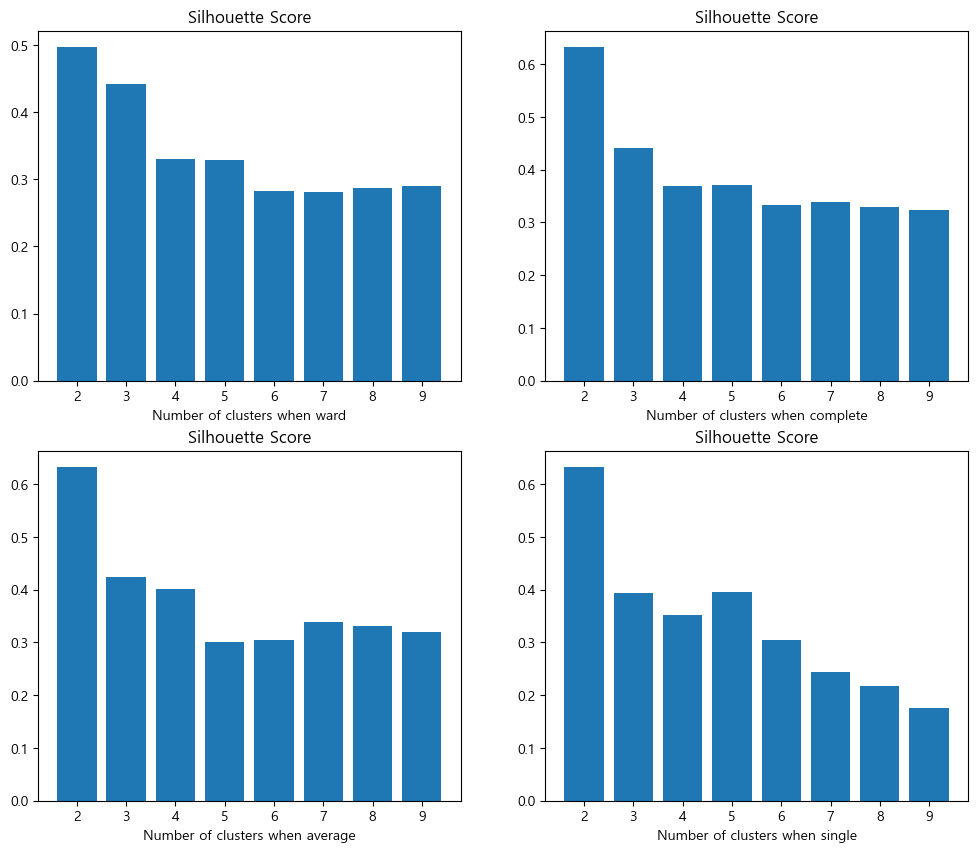

In [113]:
plt.figure(figsize=(12,10))
for n in range(0,len(linkage)):
    plt.subplot(2, 2, n+1)
    plt.bar(range(2,10), sil_scores[n], )
    plt.xlabel("Number of clusters when "+linkage[n])
    plt.title("Silhouette Score")
plt.show()

In [123]:
agg = AgglomerativeClustering(n_clusters=4, linkage='average')
labels=agg.fit_predict(scaled_data)
print(silhouette_score(scaled_data, labels))

0.4011545610076085


In [124]:
for i, label in enumerate(labels):
    print(f"행 {i+1}: Cluster {label+1}")

행 1: Cluster 3
행 2: Cluster 3
행 3: Cluster 3
행 4: Cluster 3
행 5: Cluster 3
행 6: Cluster 3
행 7: Cluster 1
행 8: Cluster 3
행 9: Cluster 1
행 10: Cluster 3
행 11: Cluster 1
행 12: Cluster 4
행 13: Cluster 1
행 14: Cluster 3
행 15: Cluster 3
행 16: Cluster 3
행 17: Cluster 3
행 18: Cluster 2
행 19: Cluster 3
행 20: Cluster 3
행 21: Cluster 3
행 22: Cluster 3
행 23: Cluster 3
행 24: Cluster 3
행 25: Cluster 3
행 26: Cluster 3


In [125]:
data_features= data.columns
data_with_labels = pd.DataFrame(data, columns=data_features)
data_with_labels['Cluster'] = labels

cluster_features = data_with_labels.groupby('Cluster')[data_features].mean()

# 클러스터별 특징 출력
for cluster_id, features in cluster_features.iterrows():
    print(f"Cluster {cluster_id+1}:")
    for feature, value in features.iteritems():
        print(f"- {feature}: {value}")

Cluster 1:
- 견인수: 538.75
- pc방수: 3.75
- 카페수: 147.25
- 기숙사고시원수: 2.0
- 독서실수: 4.75
- 편의점수: 43.25
- 숙박업: 25.75
- 학원수: 125.0
- 병원수: 23.75
- 부동산수: 85.5
- 양식집: 40.25
- 한식집: 184.5
- 중식: 23.75
- 일식: 37.5
- 음식점전체수: 496.25
- 동물병원수: 3.5
- Cluster: 0.0
Cluster 2:
- 견인수: 374.0
- pc방수: 1.0
- 카페수: 257.0
- 기숙사고시원수: 5.0
- 독서실수: 3.0
- 편의점수: 28.0
- 숙박업: 132.0
- 학원수: 70.0
- 병원수: 6.0
- 부동산수: 54.0
- 양식집: 122.0
- 한식집: 123.0
- 중식: 32.0
- 일식: 73.0
- 음식점전체수: 650.0
- 동물병원수: 0.0
- Cluster: 1.0
Cluster 3:
- 견인수: 146.9
- pc방수: 0.7
- 카페수: 46.55
- 기숙사고시원수: 3.0
- 독서실수: 1.45
- 편의점수: 10.9
- 숙박업: 4.3
- 학원수: 36.35
- 병원수: 7.35
- 부동산수: 34.35
- 양식집: 8.9
- 한식집: 51.35
- 중식: 6.55
- 일식: 9.35
- 음식점전체수: 129.65
- 동물병원수: 0.95
- Cluster: 2.0
Cluster 4:
- 견인수: 1798.0
- pc방수: 6.0
- 카페수: 386.0
- 기숙사고시원수: 25.0
- 독서실수: 7.0
- 편의점수: 80.0
- 숙박업: 85.0
- 학원수: 278.0
- 병원수: 37.0
- 부동산수: 142.0
- 양식집: 137.0
- 한식집: 417.0
- 중식: 54.0
- 일식: 142.0
- 음식점전체수: 1404.0
- 동물병원수: 7.0
- Cluster: 3.0


C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


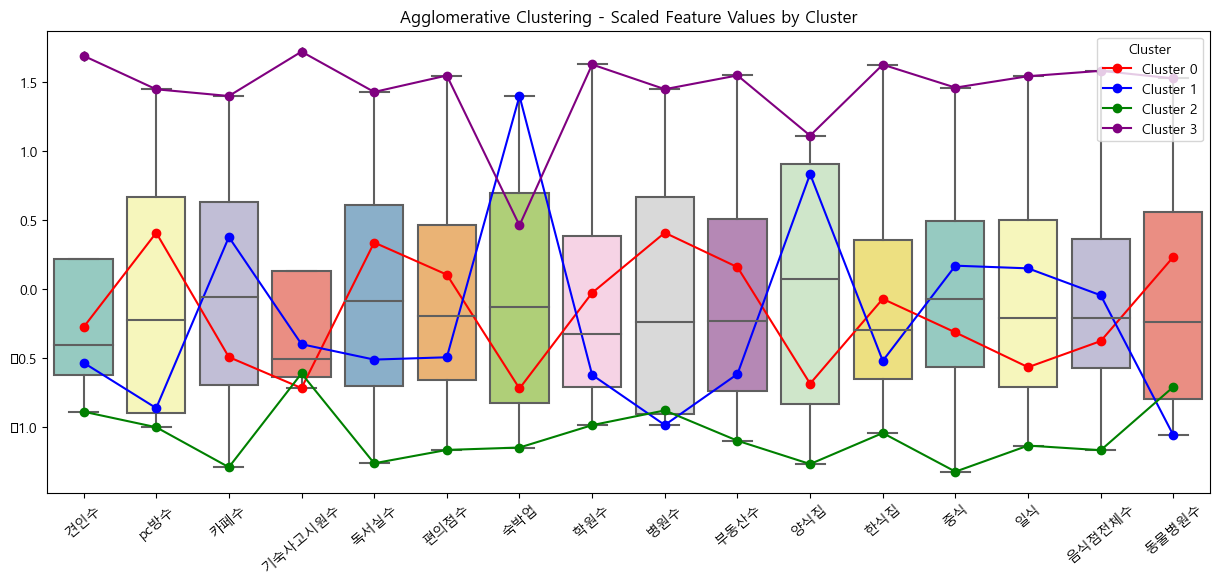

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 각 클러스터별 특징 평균 데이터프레임을 재구성하여 데이터를 그룹화
cluster_features = data_with_labels.groupby('Cluster').mean().reset_index()
cluster_features = cluster_features.drop('Cluster', axis=1)

# 스케일링
# StandardScaler를 사용하여 표준화
# scaler = StandardScaler()
# scaled_cluster_features = scaler.fit_transform(cluster_features)

# MinMaxScaler를 사용하여 정규화
scaler = StandardScaler()
scaled_cluster_features = scaler.fit_transform(cluster_features)

# 클러스터별 특징 값에 대한 box plot 시각화
plt.figure(figsize=(15, 6))
sns.boxplot(data=scaled_cluster_features, palette='Set3')

# 클러스터별 특징 값에 대한 선 시각화
cluster_colors = ['red', 'blue', 'green', 'purple','orange']  # 클러스터별 색상 설정
for cluster_id in range(len(cluster_features)):
    plt.plot(range(len(cluster_features.columns)), scaled_cluster_features[cluster_id], marker='o', markersize=6,
             color=cluster_colors[cluster_id], label=f'Cluster {cluster_id}')

plt.xticks(range(len(cluster_features.columns)), cluster_features.columns, rotation=40)
plt.title('Agglomerative Clustering - Scaled Feature Values by Cluster')
plt.legend(title='Cluster', loc='upper right')
plt.show()


###  결과

1. cluster1 : 특징이 없다.
2. cluster2 : pc방수, 편의점 수 ,동물병원수가 많은 지역
3. cluster3 : 카페수, 숙박업 수, 양식집이 많은 지역
4. cluster4 : 독서실수, 병원수가 많은 지역
5. cluster5 : 기숙사/고시원 수, 학원수, 부동산수, 한식집이 많은 지역

# DBSCAN

In [72]:
dbscan = DBSCAN(min_samples=2)
dbscan.fit(scaled_data)

DBSCAN(min_samples=2)

In [73]:
assignments_X_train = dbscan.labels_
print(assignments_X_train)

[-1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1  0  0
 -1  0]


C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


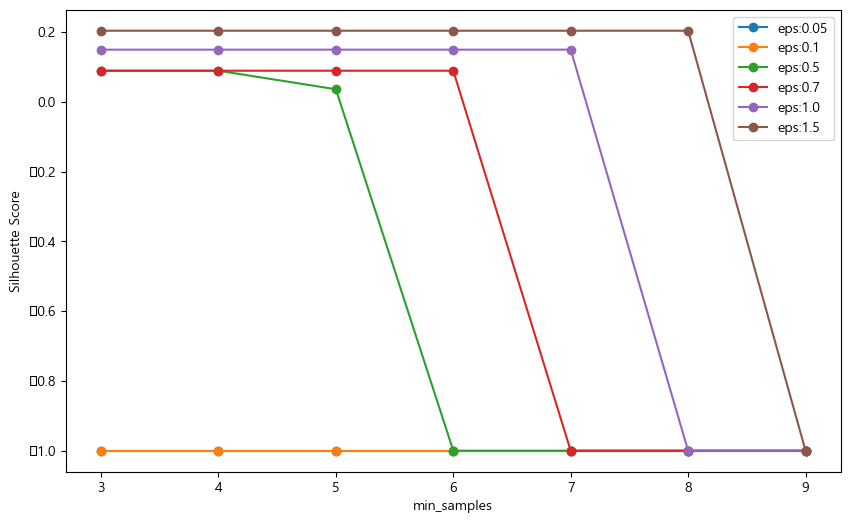

Best Silhouette Score: 0.20374381429350133
Best Parameters: {'eps': 1.5, 'min_samples': 3}
sil scores: [[-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [0.08910443310077404, 0.08910443310077404, 0.0359978245631009, -1, -1, -1, -1], [0.08910443310077404, 0.08910443310077404, 0.08910443310077404, 0.08910443310077404, -1, -1, -1], [0.14947082848942947, 0.14947082848942947, 0.14947082848942947, 0.14947082848942947, 0.14947082848942947, -1, -1], [0.20374381429350133, 0.20374381429350133, 0.20374381429350133, 0.20374381429350133, 0.20374381429350133, 0.20374381429350133, -1]]


In [74]:
eps_list = [0.05, 0.1, 0.5, 0.7, 1.0,1.5]
min_samples_list = [3,4,5,6,7,8,9]

# 계산한 silhouette score를 저장할 리스트
sil_scores = []
best_score=0
best_params={}
# eps와 min_samples를 바꿔가며 silhouette score 계산
for eps in eps_list:
    sil_scores_n=[]
    for min_samples in min_samples_list:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(scaled_data)
        if len(set(cluster_labels)) > 1:
            cluster_labels[cluster_labels == -1] = len(set(cluster_labels))
            score = silhouette_score(scaled_data, cluster_labels)
            
            sil_scores_n.append(score)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples':min_samples}
        else:
            sil_scores_n.append(-1)  # 클러스터가 하나 이하인 경우는 silhouette score를 -1로 처리
    sil_scores.append(sil_scores_n)

# 계산한 silhouette score로 elbow point 그래프 그리기
scores_2d = np.array(sil_scores).reshape(len(eps_list), len(min_samples_list))
plt.figure(figsize=(10, 6))
for i, eps in enumerate(eps_list):
    plt.plot(min_samples_list, scores_2d[i], 'o-', label='eps: {}'.format(eps))
plt.xticks(min_samples_list)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.legend(['eps:{}'.format(eps) for eps in eps_list])
plt.show()

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)
print("sil scores:", sil_scores)

In [75]:
db = DBSCAN(eps=1.5, min_samples=3)
cluster_labels = db.fit_predict(scaled_data)

# 클러스터 레이블 출력
print("Cluster Labels:")
print(cluster_labels)

Cluster Labels:
[-1  0 -1  0 -1 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1  0  0
 -1  0]


결과: 이상치가 매우 많고 결과가 안좋음을 직관적으로 확인하였다.

# 결론

전체적으로 실루엣 점수를 비교하였을때, agglomerative 의 결과가 가장 좋다고 판단하였다.


best algorithm: agglomerative
n_clusters:4, linkage: average, 실루엣 점수:0.4011545610076085

1. cluster1 : pc방수, 독서실 수, 동물병원수가 많은 지역
2. cluster2 : 숙박업, 양식집, 카페수가 많은 지역
3. cluster3 : 특징이 없다.
4. cluster4 : 기숙사/고시원수, 한식집이 많은 지역

    
1. cluster1 : 동교동, 망원동, 상암동, 성산동
2. cluster2 : 연남동
3. cluster3 : 공덕동, 구수동, 노고산동, 당인동, 대흥동, 도화동, 마포동,상수동, 신공덕동, 신수동, 신정동, 아현동, 염리동, 용강동, 중동 ,창전동, 토정동, 하중동,합정동,현석동
4. cluster4 : 서교동



# 송파구

## EDA

In [5]:
df = pd.read_csv('C:/Users/tpdus/OneDrive/바탕 화면/팀프로젝트/데이터마이닝/진짜완료데이터/송파33.csv',encoding = 'cp949')
#법정동 제외
df = df.iloc[:,1:]
df

,견인수,PC방수,카페수,기숙사수,약국수,편의점수,학원수,병원수,동물병원수,정류장수,지하철역수,숙박업소수,고등학교수,일식,중식,양식,한식,전체음식점수,따릉이대여소수
0,22,2,42,10,38,20,42,9,2,31,0,1,1,3,8,3,93,240,134
1,42,6,44,3,18,32,66,31,5,41,1,4,1,7,3,6,93,255,185
2,30,7,32,3,21,32,30,14,3,25,1,3,0,4,8,9,154,348,90
3,185,11,132,28,35,74,176,47,6,47,5,38,4,65,35,37,357,993,304
4,91,6,73,2,12,35,79,12,7,28,2,0,2,13,8,9,119,327,198
5,126,1,141,10,26,50,106,25,8,18,0,9,3,44,20,67,151,659,103
6,70,7,90,15,29,46,74,25,5,18,2,8,0,21,23,25,210,600,54
7,48,4,58,11,17,34,79,24,6,12,1,6,1,14,8,14,131,356,45
8,217,18,150,30,50,57,126,59,4,54,5,5,0,42,30,34,370,964,280
9,315,7,270,12,31,88,168,49,7,50,1,2,0,73,46,45,419,1230,341


In [7]:
print('feature: ', df.columns)
print('feature개수:', len(df.columns))

feature:  Index(['견인수', 'PC방수', '카페수', '기숙사수', '약국수', '편의점수', '학원수', '병원수', '동물병원수',
       '정류장수', '지하철역수', '숙박업소수', '고등학교수', '일식', '중식', '양식', '한식', '전체음식점수',
       '따릉이대여소수'],
      dtype='object')
feature개수: 19


In [8]:
print('instance 수:', len(df))

instance 수: 13


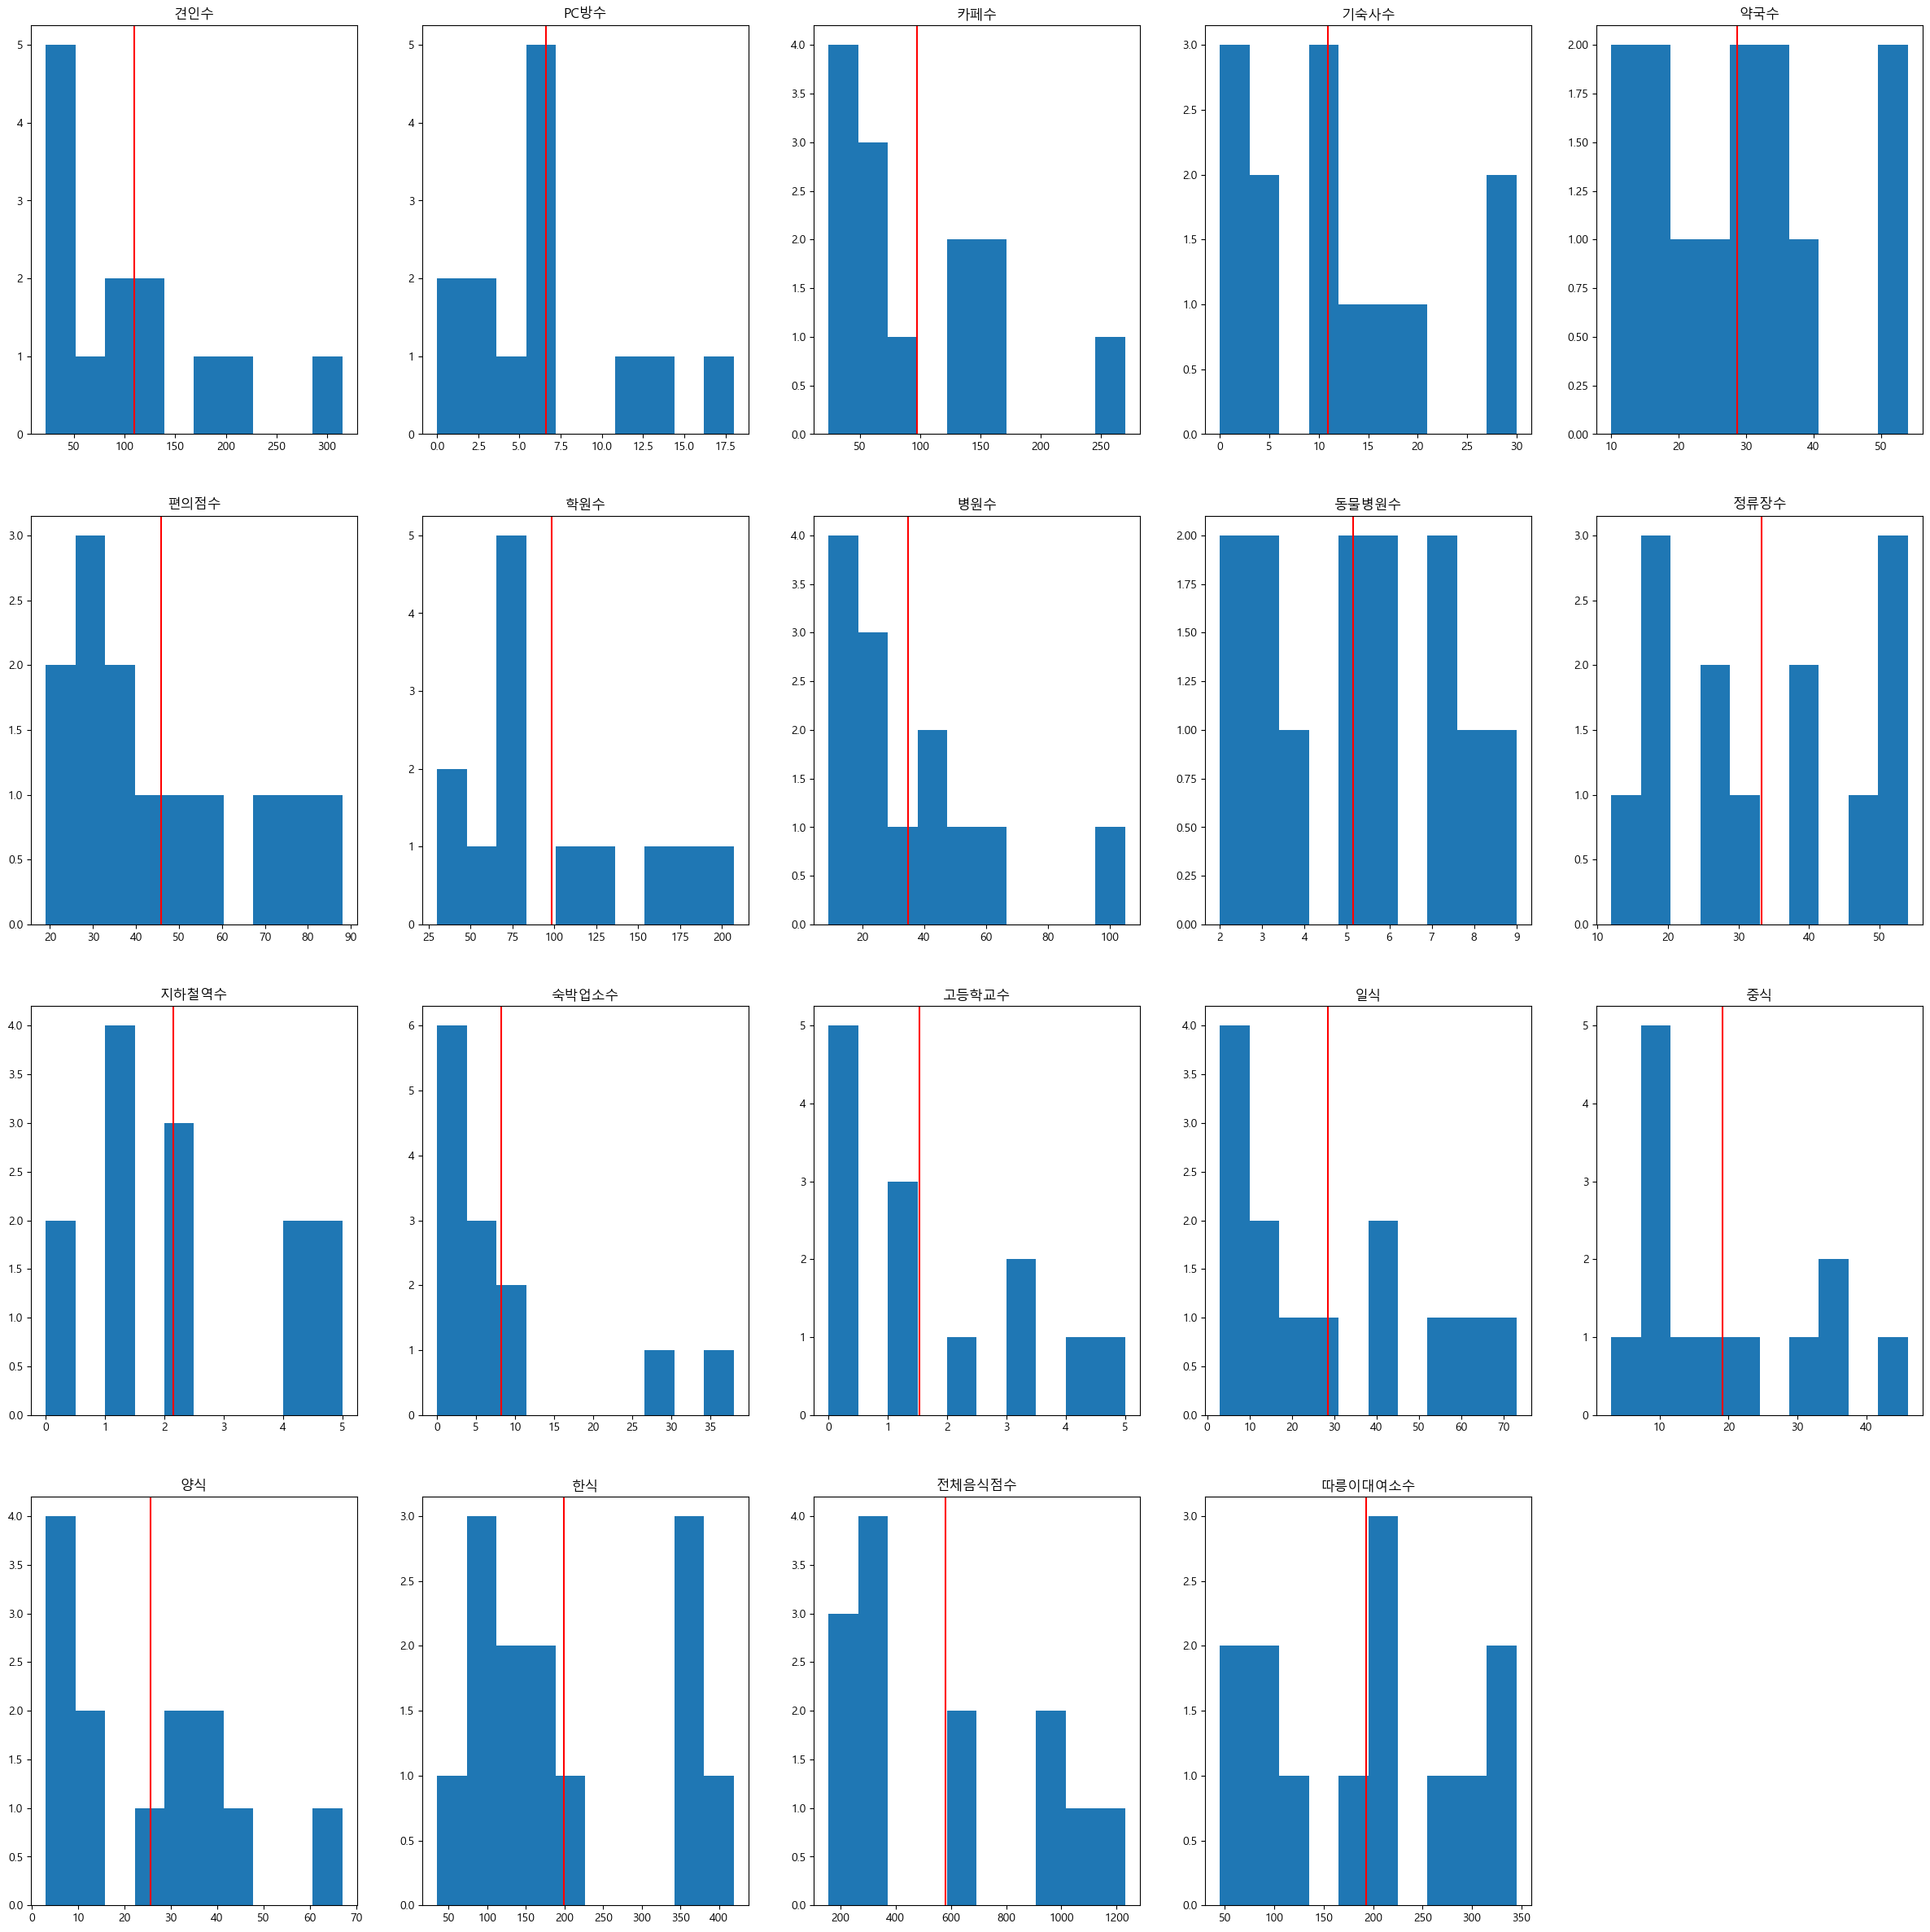

In [9]:
#feature 에 대한 데이터 분포확인
plt.figure(figsize=(30,30))
for i in range(1,20):
    plt.subplot(4,5,i)
    plt.hist(df[df.columns[i-1]])
    plt.title('{}'.format(df.columns[i-1]))
    plt.axvline(df[df.columns[i-1]].mean(),color='red')

plt.show()

In [11]:
#feature에 대한 통계량 확인
df.iloc[:,:20].describe()

,견인수,PC방수,카페수,기숙사수,약국수,편의점수,학원수,병원수,동물병원수,정류장수,지하철역수,숙박업소수,고등학교수,일식,중식,양식,한식,전체음식점수,따릉이대여소수
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,109.307692,6.615385,97.692308,10.923077,28.692308,45.769231,98.615385,34.769231,5.153846,33.307692,2.153846,8.230769,1.538462,28.538462,19.076923,25.615385,198.692308,579.692308,193.000000
std,86.704849,5.172660,69.116309,9.869663,13.486936,22.778476,55.075007,26.217532,2.267383,14.516569,1.772294,11.903458,1.713446,24.363960,13.616543,19.163935,130.203293,366.257283,103.838015
min,22.000000,0.000000,24.000000,0.000000,10.000000,19.000000,30.000000,9.000000,2.000000,12.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,35.000000,158.000000,45.000000
25%,42.000000,3.000000,44.000000,3.000000,18.000000,32.000000,66.000000,14.000000,3.000000,19.000000,1.000000,1.000000,0.000000,7.000000,8.000000,9.000000,94.000000,327.000000,103.000000
50%,91.000000,6.000000,73.000000,10.000000,29.000000,35.000000,79.000000,25.000000,5.000000,31.000000,2.000000,4.000000,1.000000,21.000000,14.000000,25.000000,151.000000,356.000000,198.000000
75%,139.000000,7.000000,141.000000,15.000000,35.000000,57.000000,126.000000,47.000000,7.000000,47.000000,4.000000,8.000000,3.000000,44.000000,30.000000,37.000000,357.000000,964.000000,280.000000
max,315.000000,18.000000,270.000000,30.000000,54.000000,88.000000,207.000000,105.000000,9.000000,54.000000,5.000000,38.000000,5.000000,73.000000,46.000000,67.000000,419.000000,1230.000000,345.000000


In [12]:
# 결측치 확인
df.isnull().sum()

견인수        0
PC방수       0
카페수        0
기숙사수       0
약국수        0
편의점수       0
학원수        0
병원수        0
동물병원수      0
정류장수       0
지하철역수      0
숙박업소수      0
고등학교수      0
일식         0
중식         0
양식         0
한식         0
전체음식점수     0
따릉이대여소수    0
dtype: int64

In [13]:
# 데이터 유형 확인 
df.dtypes

견인수        int64
PC방수       int64
카페수        int64
기숙사수       int64
약국수        int64
편의점수       int64
학원수        int64
병원수        int64
동물병원수      int64
정류장수       int64
지하철역수      int64
숙박업소수      int64
고등학교수      int64
일식         int64
중식         int64
양식         int64
한식         int64
전체음식점수     int64
따릉이대여소수    int64
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '견인수'),
  Text(1, 0, 'PC방수'),
  Text(2, 0, '카페수'),
  Text(3, 0, '기숙사수'),
  Text(4, 0, '약국수'),
  Text(5, 0, '편의점수'),
  Text(6, 0, '학원수'),
  Text(7, 0, '병원수'),
  Text(8, 0, '동물병원수'),
  Text(9, 0, '정류장수'),
  Text(10, 0, '지하철역수'),
  Text(11, 0, '숙박업소수'),
  Text(12, 0, '고등학교수'),
  Text(13, 0, '일식'),
  Text(14, 0, '중식'),
  Text(15, 0, '양식'),
  Text(16, 0, '한식'),
  Text(17, 0, '전체음식점수'),
  Text(18, 0, '따릉이대여소수')])

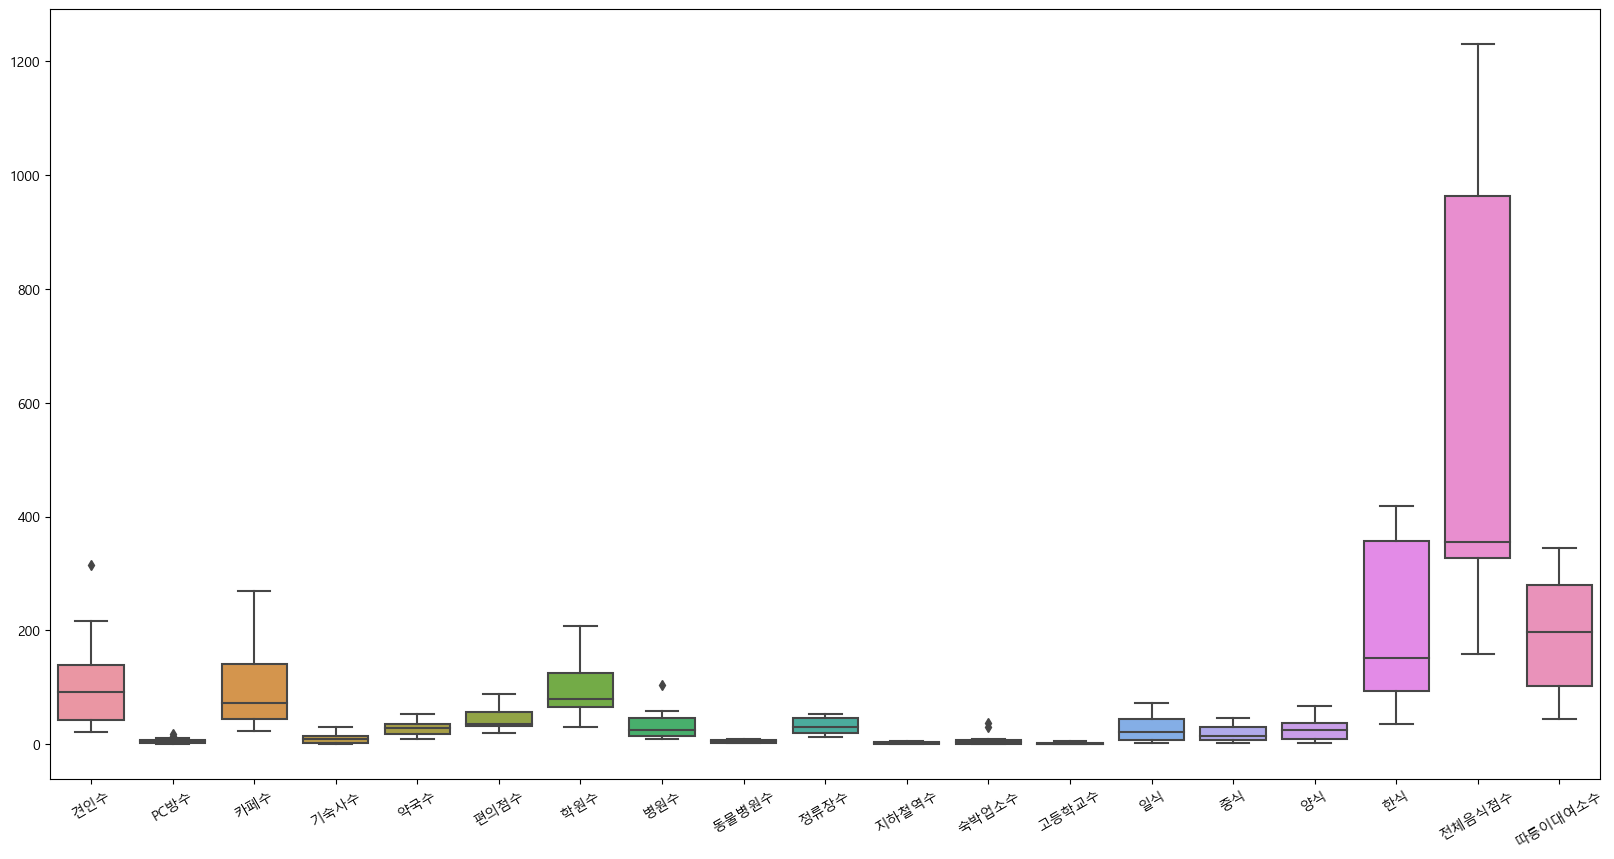

In [14]:
# 모든 feature를 보여주는 boxplot
plt.figure(figsize = (20,10))
sns.boxplot(data = df)
plt.xticks(rotation=30)

<AxesSubplot:>

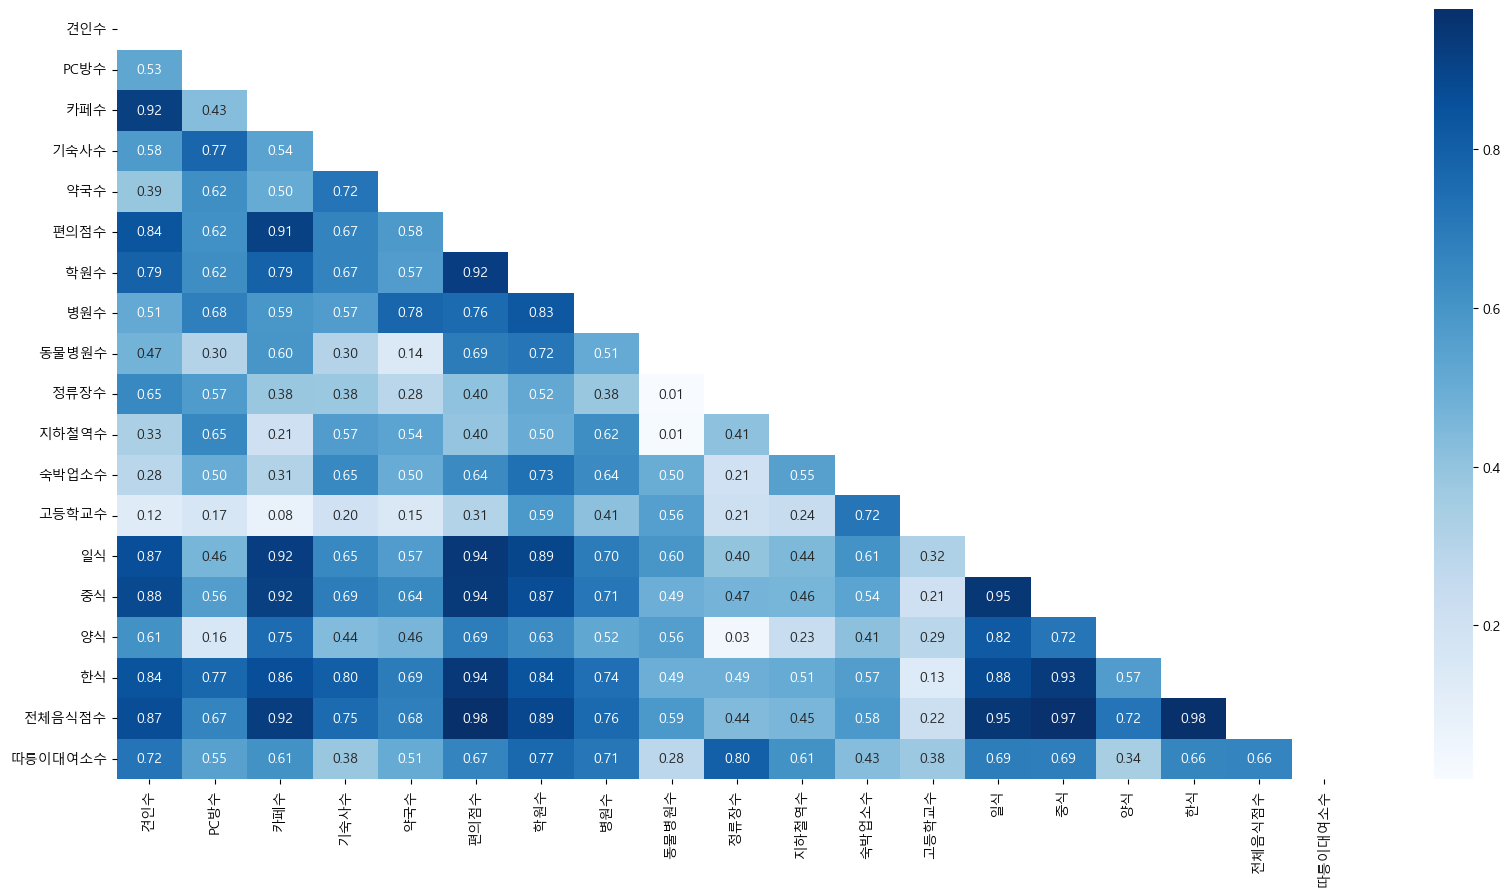

In [6]:
#상관관계 확인
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = df.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Blues')

상관계수가 0.5 를 넘지못하는 변수들은 삭제하였습니다.

제외할 변수들: 약국수,동물병원수, 지하철역수, 숙박업소수, 고등학교수, 병원 수

In [17]:
columns_to_drop=['약국수','동물병원수','지하철역수','숙박업소수','고등학교수','병원수']
df=df.drop(columns_to_drop, axis=1)

<AxesSubplot:>

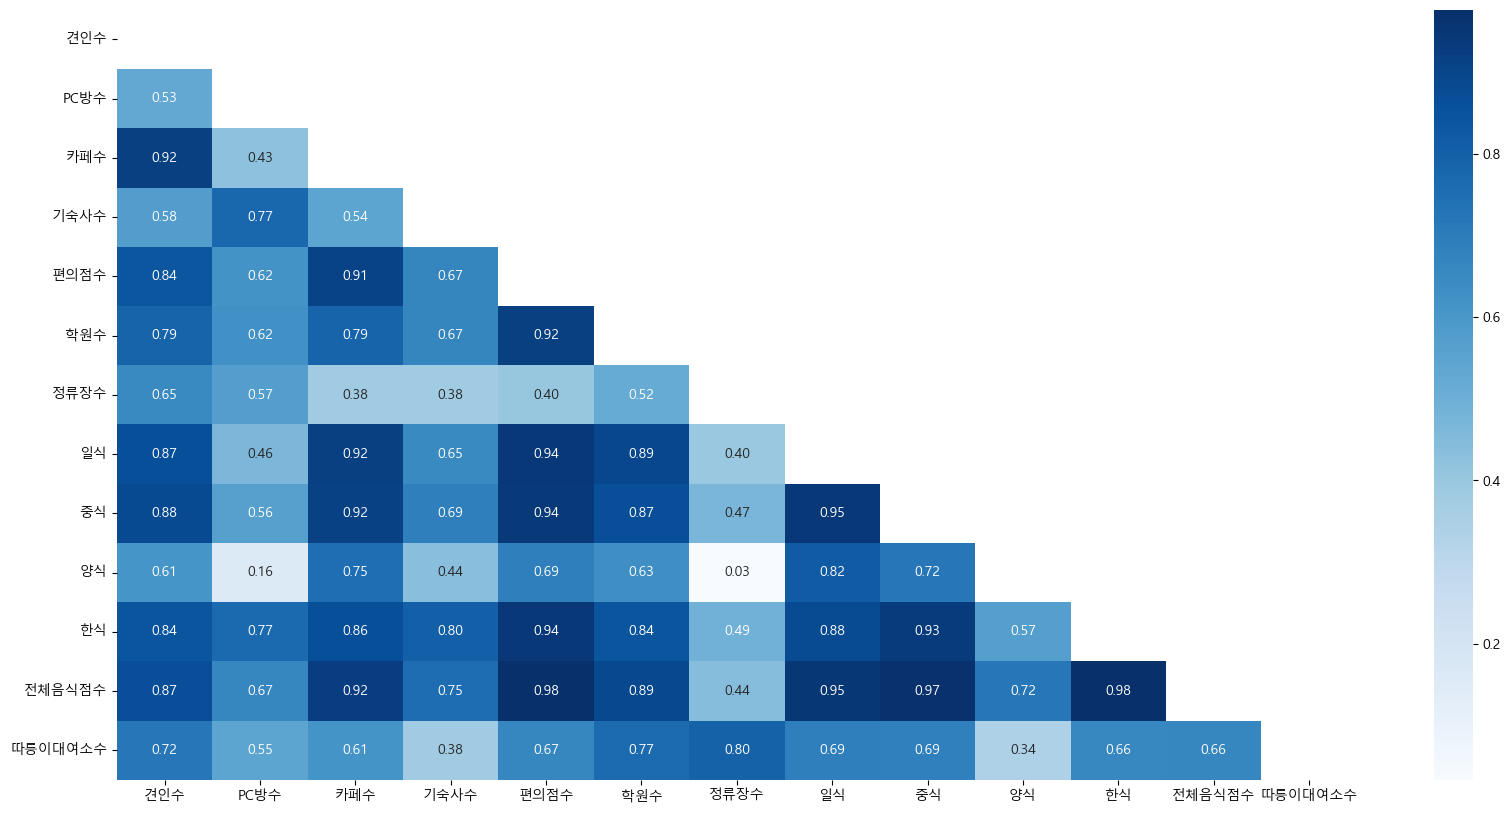

In [18]:
# 변수 삭제 후 상관관계 확인하기
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = df.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Blues')

In [21]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Text(0, 0.5, 'Feature magnitude')

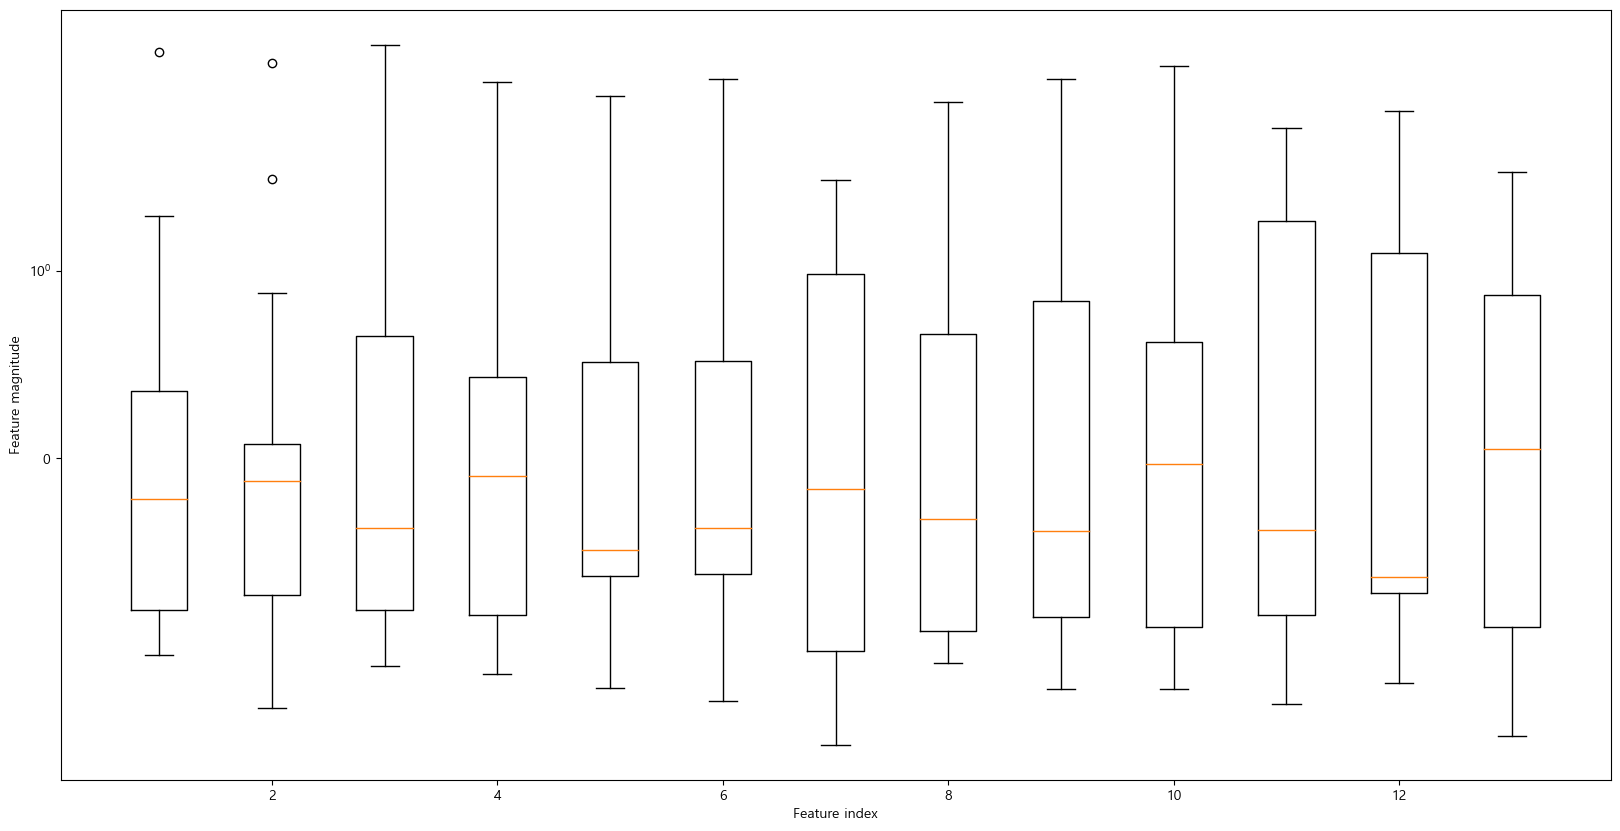

In [22]:
plt.boxplot(df_scaled,manage_ticks = False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

# K-means

In [25]:

kmeans =KMeans(n_clusters = 3)
kmeans.fit(df_scaled)

assignments_df_scaled = kmeans.labels_
print(assignments_df_scaled)

[2 2 2 1 2 0 0 2 1 1 2 1 2]


In [26]:
print('cluster_center:', kmeans.cluster_centers_)

cluster_center: [[-0.13574119 -0.52626283  0.26816875  0.16629884  0.10193211 -0.16281753
  -1.09755628  0.16923767  0.18521723  1.10713067 -0.14542761  0.14154392
  -1.14770471]
 [ 1.25676027  1.18409136  1.17171787  1.16814795  1.32423876  1.33488568
   1.01758359  1.2799626   1.33180006  0.74052419  1.41538271  1.37488873
   1.24794093]
 [-0.67936553 -0.52626283 -0.74617271 -0.71502707 -0.78583132 -0.71627253
  -0.26788883 -0.77976082 -0.81394781 -0.73947973 -0.76723937 -0.82609182
  -0.38519347]]


In [43]:
#하이퍼파라미터  조정해주는 과정입니다.
sil_scores = []
inertia = []
best_score=0
algorithm=['elkan','auto','full']
best_params={}
inertia1 = []
for algo in algorithm: #2에서 9ㄲㅏ지
    sil_scores_n = []
   
    for n_clusters in range(2,10):
        kmeans = KMeans(n_clusters=n_clusters, algorithm= algo, random_state=0)
        cluster_labels = kmeans.fit_predict(df_scaled)
        score = silhouette_score(df_scaled, cluster_labels)
        sil_scores_n.append(score)
        
        
        
        if score > best_score:
            best_score = score
            best_params = {'n_cluster': n_clusters, '알고리즘': algo}
    sil_scores.append(sil_scores_n)
    inertia.append(kmeans.inertia_)
        

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)


print("sil_scores:",sil_scores)

C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

Best Silhouette Score: 0.561821356385182
Best Parameters: {'n_cluster': 2, '알고리즘': 'elkan'}
sil_scores: [[0.561821356385182, 0.3520464177663879, 0.28923231112408887, 0.2483216690929625, 0.2305165940958823, 0.18705564796530405, 0.14254017828858473, 0.12493586145867154], [0.561821356385182, 0.3520464177663879, 0.28923231112408887, 0.2483216690929625, 0.2305165940958823, 0.18705564796530405, 0.14254017828858473, 0.12493586145867154], [0.561821356385182, 0.3520464177663879, 0.28923231112408887, 0.2483216690929625, 0.2305165940958823, 0.18705564796530405, 0.14254017828858473, 0.12493586145867154]]


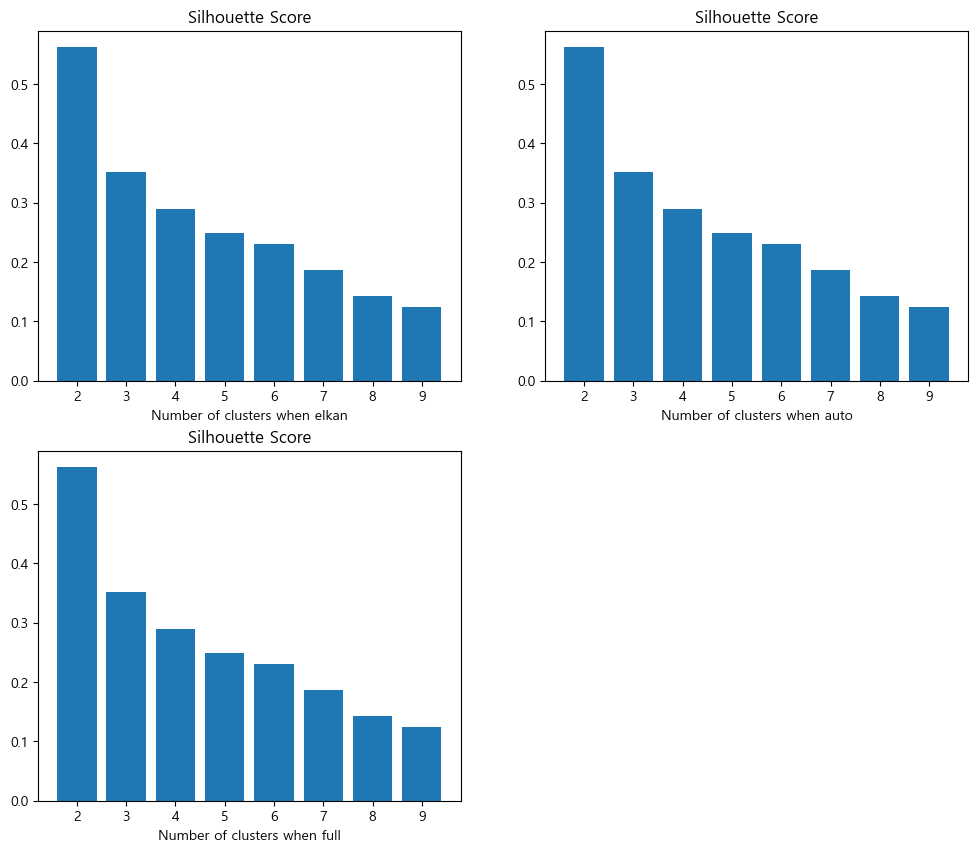

In [28]:
plt.figure(figsize=(12,10))
for n in range(0,len(algorithm)):
    plt.subplot(2,2, n+1)
    plt.bar(range(2,10), sil_scores[n], )
    plt.xlabel("Number of clusters when "+algorithm[n])
    plt.title("Silhouette Score")
plt.show()

C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'K-Means Inertia')

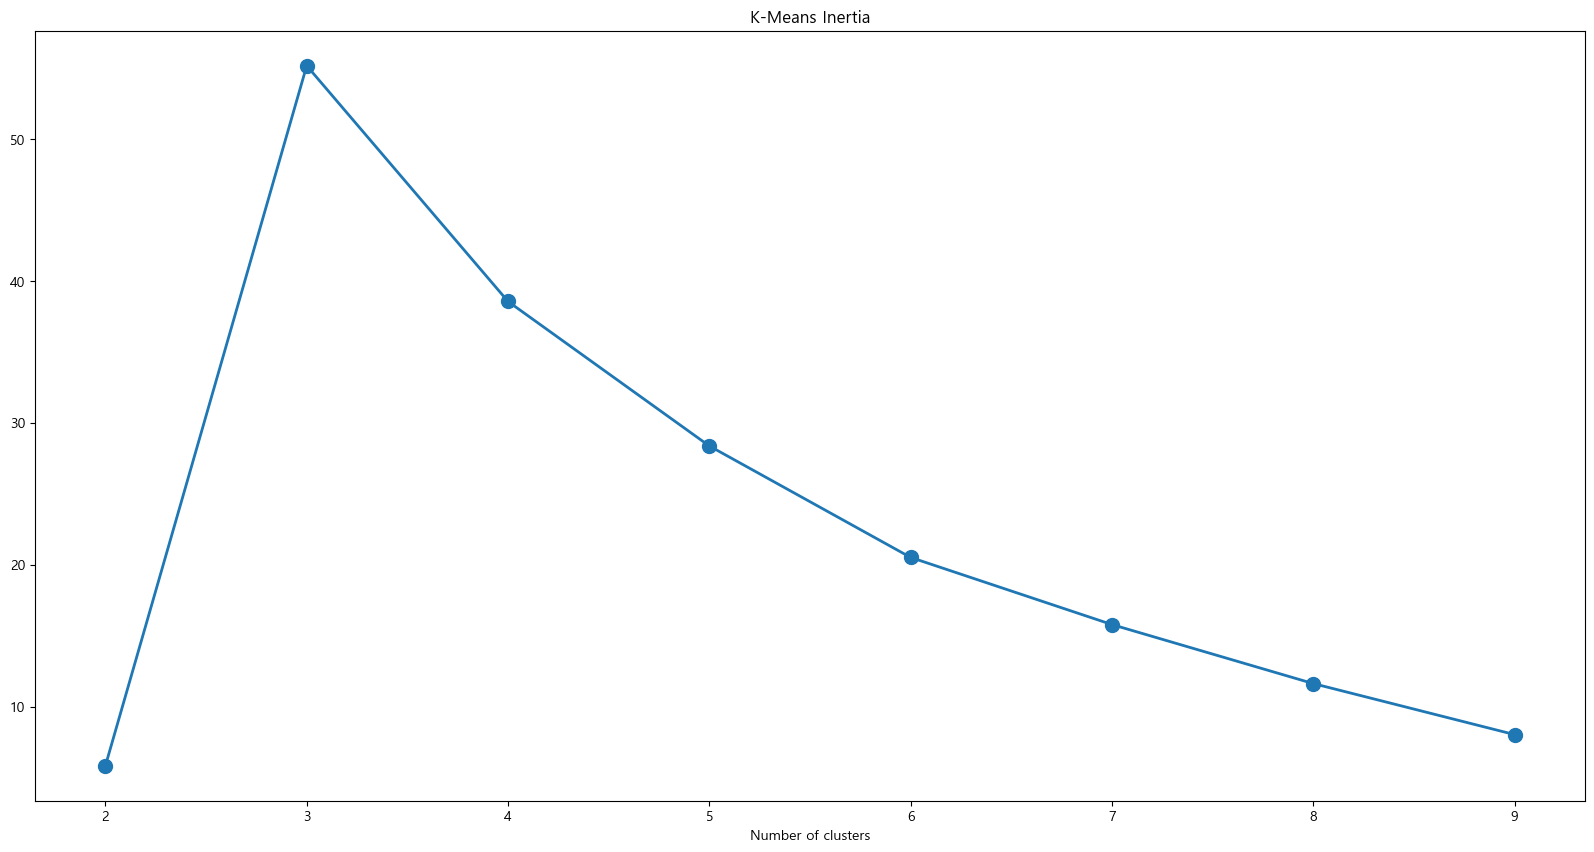

In [29]:
inertia1=[]
algorithm=['elkan','auto','full']
for n_clusters in range(2,10):
    inertia1.append(kmeans.inertia_)
   
    for algo in algorithm:
        kmeans = KMeans(n_clusters=n_clusters, algorithm= algo, random_state=0)
        cluster_labels = kmeans.fit_predict(df_scaled)
        score = silhouette_score(scaled_data, cluster_labels)
plt.plot(range(2,10), inertia1, marker='o', lw=2, ms=10)
plt.xlabel("Number of clusters")
plt.title("K-Means Inertia")

In [38]:
#종합적으로 결과를 참고하였을때 n_cluster=3, algorithm=elkan 을사용하기로 했습니다.
kmeans = KMeans(n_clusters=3, algorithm= 'elkan', random_state=0)
kmeans.fit(df_scaled)


KMeans(algorithm='elkan', n_clusters=3, random_state=0)

In [39]:
cluster_labels = kmeans.fit_predict(df_scaled)

# 각 행의 클러스터 레이블 출력
for i, label in enumerate(cluster_labels):
    print("행", i+1, "은(는) 클러스터", label+1, "에 속합니다.")

행 1 은(는) 클러스터 1 에 속합니다.
행 2 은(는) 클러스터 1 에 속합니다.
행 3 은(는) 클러스터 1 에 속합니다.
행 4 은(는) 클러스터 2 에 속합니다.
행 5 은(는) 클러스터 1 에 속합니다.
행 6 은(는) 클러스터 3 에 속합니다.
행 7 은(는) 클러스터 3 에 속합니다.
행 8 은(는) 클러스터 3 에 속합니다.
행 9 은(는) 클러스터 2 에 속합니다.
행 10 은(는) 클러스터 2 에 속합니다.
행 11 은(는) 클러스터 1 에 속합니다.
행 12 은(는) 클러스터 2 에 속합니다.
행 13 은(는) 클러스터 1 에 속합니다.


In [40]:
data_features= df.columns
data_with_labels = pd.DataFrame(df, columns=data_features)
data_with_labels['Cluster'] = cluster_labels

cluster_features = data_with_labels.groupby('Cluster')[data_features].mean()

# 클러스터별 특징 출력
for cluster_id, features in cluster_features.iterrows():
   
    print(f"Cluster {cluster_id+1}:")
    for feature, value in features.iteritems():
       
        print(f"- {feature}: {value}")
    cluster_id += 1 
    print()


Cluster 1:
- 견인수: 53.5
- PC방수: 4.0
- 카페수: 46.5
- 기숙사수: 3.0
- 편의점수: 27.666666666666668
- 학원수: 57.666666666666664
- 정류장수: 32.5
- 일식: 9.666666666666666
- 중식: 8.5
- 양식: 11.666666666666666
- 한식: 98.0
- 전체음식점수: 277.8333333333333
- 따릉이대여소수: 172.83333333333334
- Cluster: 0.0

Cluster 2:
- 견인수: 214.0
- PC방수: 12.5
- 카페수: 175.5
- 기숙사수: 22.0
- 편의점수: 74.75
- 학원수: 169.25
- 정류장수: 47.5
- 일식: 58.5
- 중식: 36.5
- 양식: 39.25
- 한식: 375.75
- 전체음식점수: 1063.5
- 따릉이대여소수: 317.5
- Cluster: 1.0

Cluster 3:
- 견인수: 81.33333333333333
- PC방수: 4.0
- 카페수: 96.33333333333333
- 기숙사수: 12.0
- 편의점수: 43.333333333333336
- 학원수: 86.33333333333333
- 정류장수: 16.0
- 일식: 26.333333333333332
- 중식: 17.0
- 양식: 35.333333333333336
- 한식: 164.0
- 전체음식점수: 538.3333333333334
- 따릉이대여소수: 67.33333333333333
- Cluster: 2.0



Index(['견인수', 'PC방수', '카페수', '기숙사수', '편의점수', '학원수', '정류장수', '일식', '중식', '양식',
       '한식', '전체음식점수', '따릉이대여소수', 'Cluster'],
      dtype='object')


C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


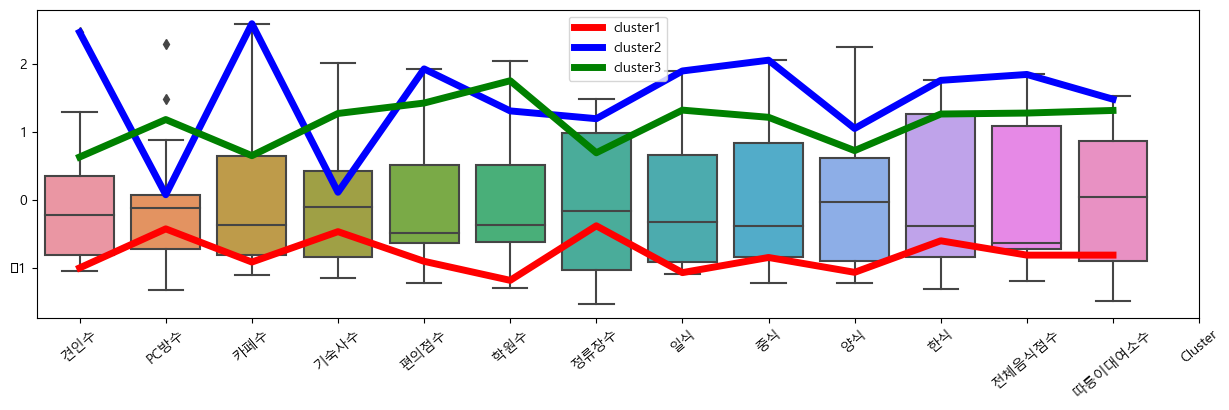

In [44]:
plt.figure(figsize = (15,4))
sns.boxplot(data = df_scaled)
pd.Series(kmeans.cluster_centers_[0]).plot(color = 'red',linewidth='5',label = 'cluster1')
pd.Series(kmeans.cluster_centers_[1]).plot(color = 'blue',linewidth='5',label = 'cluster2')
pd.Series(kmeans.cluster_centers_[2]).plot(color = 'green',linewidth='5',label = 'cluster3')




feature_names=df.columns
print(feature_names)

plt.xticks(np.arange(0, len(feature_names)),feature_names,rotation = 40)
plt.legend(loc = 'upper center')




plt.show()

### 결론

1. cluster1 : 타지역에 비해 아니지만, 지역내에서는 정류장수가 많은 지역
2. cluster2 : 카페수, 편의점 수, 중식집 수 가 많은 지역
3. cluster3 : pc방수, 학원수, 따릉이 대여소 수가 많은 지역


# agglomerative

In [45]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(df)
agg = AgglomerativeClustering(n_clusters=3) 
agg.fit(df_scaled)

AgglomerativeClustering(n_clusters=3)

In [46]:
assignments_X_train = agg.labels_
print(assignments_X_train)

[2 2 2 0 2 1 1 1 0 0 2 0 2]


In [47]:
linkage = ['ward', 'complete', 'average', 'single']
sil_scores = []
sil_scores_linkage = []

best_score=0
best_parmas={}
for link in linkage:
    sil_scores_n = []
    for n_cluster in range(2,10):
        agg = AgglomerativeClustering(n_clusters=n_cluster, linkage=link)
        cluster_labels = agg.fit_predict(df_scaled)
        score=silhouette_score(df_scaled, cluster_labels)
        sil_scores_n.append(score)
        
        
        if score > best_score:
            best_score=score
            best_params={'n_cluster':n_cluster, 'linkage':link}
    sil_scores.append(sil_scores_n)
    sil_scores_linkage.append(sil_scores)
   
print('best score:',best_score)
print(best_params)
print("sil_scores:", sil_scores)
print("sil_scores_linkage",sil_scores)

best score: 0.561821356385182
{'n_cluster': 2, 'linkage': 'ward'}
sil_scores: [[0.561821356385182, 0.3520464177663879, 0.28923231112408887, 0.2483216690929625, 0.2305165940958823, 0.18705564796530405, 0.14254017828858473, 0.12493586145867154], [0.561821356385182, 0.3520464177663879, 0.28923231112408887, 0.2483216690929625, 0.16746907114920717, 0.1240081250186289, 0.14254017828858473, 0.12493586145867154], [0.561821356385182, 0.38733054568590614, 0.3390460360195471, 0.2483216690929625, 0.2305165940958823, 0.18705564796530405, 0.14254017828858473, 0.08588991914429382], [0.561821356385182, 0.4661810701236094, 0.3390460360195471, 0.2955850898889688, 0.10910446694938668, 0.11715251031939175, 0.11497786306741876, 0.06582409506179591]]
sil_scores_linkage [[0.561821356385182, 0.3520464177663879, 0.28923231112408887, 0.2483216690929625, 0.2305165940958823, 0.18705564796530405, 0.14254017828858473, 0.12493586145867154], [0.561821356385182, 0.3520464177663879, 0.28923231112408887, 0.2483216690929

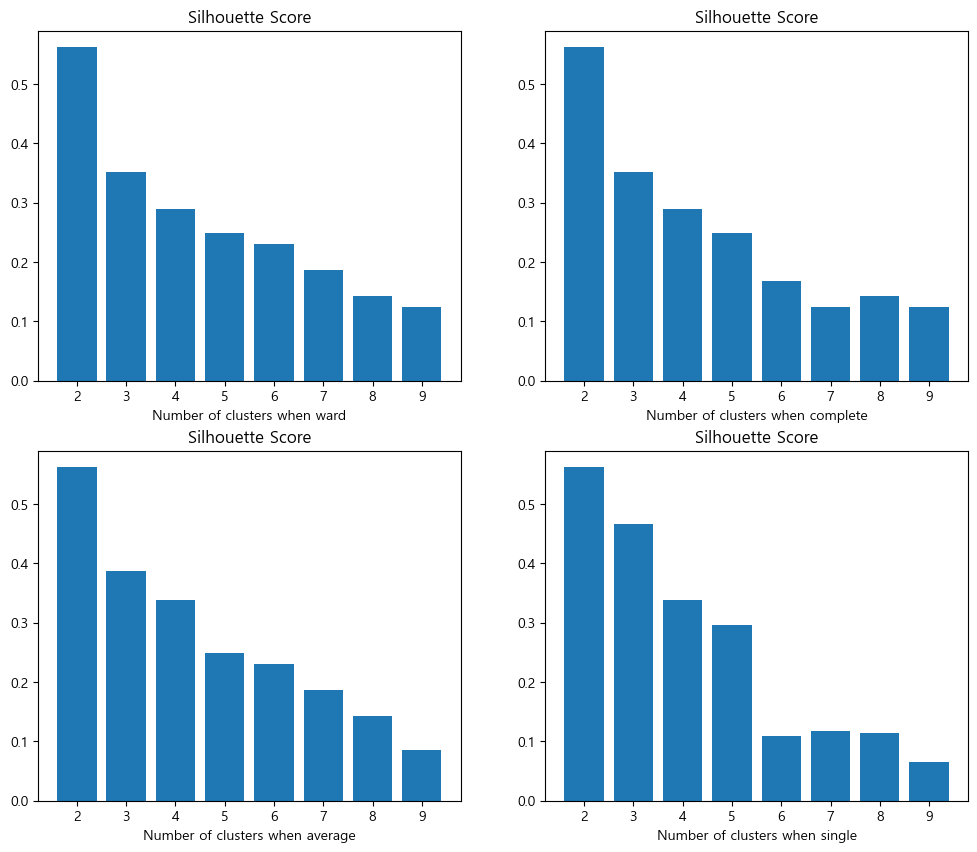

In [48]:
plt.figure(figsize=(12,10))
for n in range(0,len(linkage)):
    plt.subplot(2, 2, n+1)
    plt.bar(range(2,10), sil_scores[n], )
    plt.xlabel("Number of clusters when "+linkage[n])
    plt.title("Silhouette Score")
plt.show()

In [49]:
agg = AgglomerativeClustering(n_clusters=3, linkage='single')
labels=agg.fit_predict(df_scaled)

In [50]:
for i, label in enumerate(labels):
    print(f"행 {i}: Cluster {label}")

행 0: Cluster 0
행 1: Cluster 0
행 2: Cluster 0
행 3: Cluster 2
행 4: Cluster 0
행 5: Cluster 0
행 6: Cluster 0
행 7: Cluster 0
행 8: Cluster 2
행 9: Cluster 1
행 10: Cluster 0
행 11: Cluster 2
행 12: Cluster 0


In [51]:
data_features= df.columns
data_with_labels = pd.DataFrame(df, columns=data_features)
data_with_labels['Cluster'] = labels

cluster_features = data_with_labels.groupby('Cluster')[data_features].mean()

# 클러스터별 특징 출력
for cluster_id, features in cluster_features.iterrows():
    print(f"Cluster {cluster_id+1}:")
    for feature, value in features.iteritems():
        print(f"- {feature}: {value}")

Cluster 1:
- 견인수: 62.77777777777778
- PC방수: 4.0
- 카페수: 63.111111111111114
- 기숙사수: 6.0
- 편의점수: 32.888888888888886
- 학원수: 67.22222222222223
- 정류장수: 27.0
- 일식: 15.222222222222221
- 중식: 11.333333333333334
- 양식: 19.555555555555557
- 한식: 120.0
- 전체음식점수: 364.6666666666667
- 따릉이대여소수: 137.66666666666666
- Cluster: 0.0
Cluster 2:
- 견인수: 315.0
- PC방수: 7.0
- 카페수: 270.0
- 기숙사수: 12.0
- 편의점수: 88.0
- 학원수: 168.0
- 정류장수: 50.0
- 일식: 73.0
- 중식: 46.0
- 양식: 45.0
- 한식: 419.0
- 전체음식점수: 1230.0
- 따릉이대여소수: 341.0
- Cluster: 1.0
Cluster 3:
- 견인수: 180.33333333333334
- PC방수: 14.333333333333334
- 카페수: 144.0
- 기숙사수: 25.333333333333332
- 편의점수: 70.33333333333333
- 학원수: 169.66666666666666
- 정류장수: 46.666666666666664
- 일식: 53.666666666666664
- 중식: 33.333333333333336
- 양식: 37.333333333333336
- 한식: 361.3333333333333
- 전체음식점수: 1008.0
- 따릉이대여소수: 309.6666666666667
- Cluster: 2.0


C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


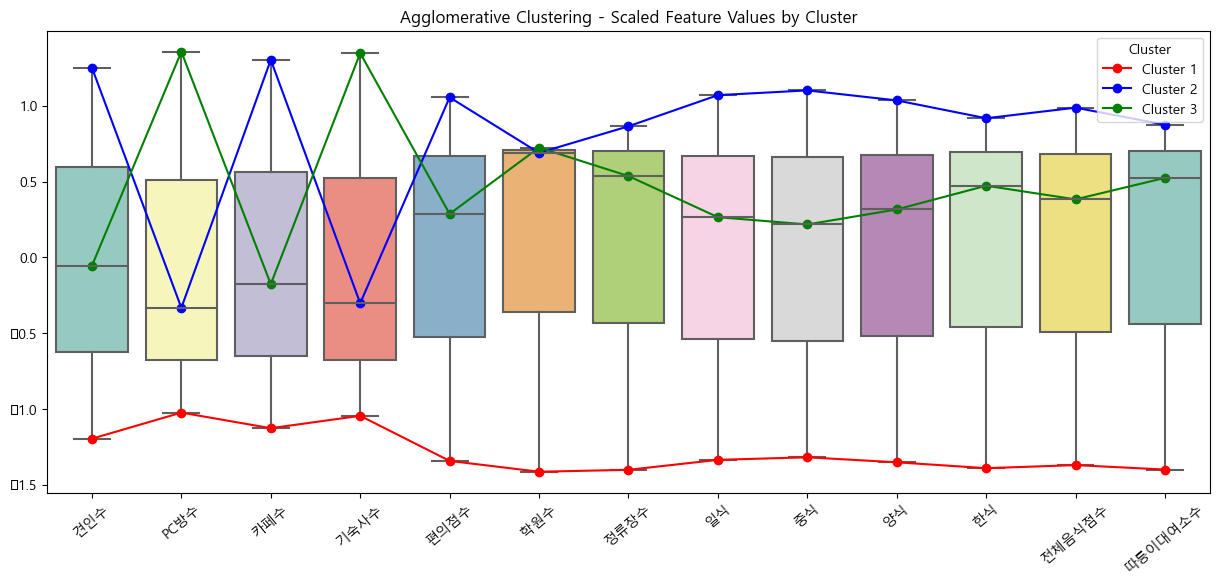

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 각 클러스터별 특징 평균 데이터프레임을 재구성하여 데이터를 그룹화
cluster_features = data_with_labels.groupby('Cluster').mean().reset_index()
cluster_features = cluster_features.drop('Cluster', axis=1)

# 스케일링

scaler = StandardScaler()
scaled_cluster_features = scaler.fit_transform(cluster_features)

# 클러스터별 특징 값에 대한 box plot 시각화
plt.figure(figsize=(15, 6))
sns.boxplot(data=scaled_cluster_features, palette='Set3')

# 클러스터별 특징 값에 대한 선 시각화
cluster_colors = ['red', 'blue', 'green']  # 클러스터별 색상 설정
for cluster_id in range(len(cluster_features)):
    plt.plot(range(len(cluster_features.columns)), scaled_cluster_features[cluster_id], marker='o', markersize=6,
             color=cluster_colors[cluster_id], label=f'Cluster {cluster_id+1}')

plt.xticks(range(len(cluster_features.columns)), cluster_features.columns, rotation=40)
plt.title('Agglomerative Clustering - Scaled Feature Values by Cluster')
plt.legend(title='Cluster', loc='upper right')
plt.show()


###  결과

1. cluster1 : 특징이 없다.
2. cluster2 : 카페수, 편의점 수, 음식점 수 가 많은지역
3. cluster3 : pc방수, 기숙사 수가 많은 지역


# DBSCAN

In [55]:
dbscan = DBSCAN(min_samples=2)
dbscan.fit(df_scaled)

DBSCAN(min_samples=2)

In [56]:
assignments_X_train = dbscan.labels_
print(assignments_X_train)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


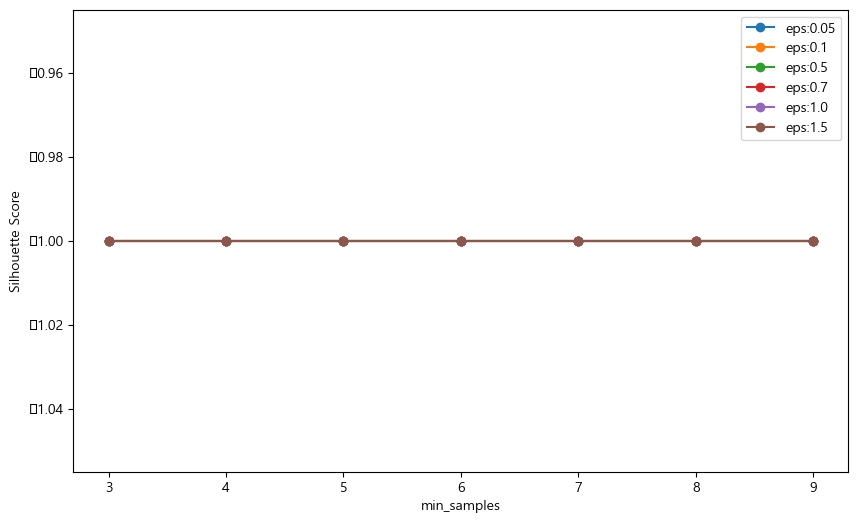

Best Silhouette Score: 0
Best Parameters: {}
sil scores: [[-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1]]


In [57]:
eps_list = [0.05, 0.1, 0.5, 0.7, 1.0,1.5]
min_samples_list = [3,4,5,6,7,8,9]

# 계산한 silhouette score를 저장할 리스트
sil_scores = []
best_score=0
best_params={}
# eps와 min_samples를 바꿔가며 silhouette score 계산
for eps in eps_list:
    sil_scores_n=[]
    for min_samples in min_samples_list:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(df_scaled)
        if len(set(cluster_labels)) > 1:
            cluster_labels[cluster_labels == -1] = len(set(cluster_labels))
            score = silhouette_score(scaled_data, cluster_labels)
            
            sil_scores_n.append(score)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples':min_samples}
        else:
            sil_scores_n.append(-1)  # 클러스터가 하나 이하인 경우는 silhouette score를 -1로 처리
    sil_scores.append(sil_scores_n)

# 계산한 silhouette score로 elbow point 그래프 그리기
scores_2d = np.array(sil_scores).reshape(len(eps_list), len(min_samples_list))
plt.figure(figsize=(10, 6))
for i, eps in enumerate(eps_list):
    plt.plot(min_samples_list, scores_2d[i], 'o-', label='eps: {}'.format(eps))
plt.xticks(min_samples_list)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.legend(['eps:{}'.format(eps) for eps in eps_list])
plt.show()

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)
print("sil scores:", sil_scores)

### 결과

전부 이상치로 분류되어 의미 없는 결과가 나왔다. 분석 알고리즘에서 제외하겠음.

# 결론

best algorithm: agglomerative

n_clusters= 3, linkage = single, 실루엣 점수: 0.4661810701236094



1. cluster1 : 특징이 없다.
2. cluster2 : 카페수, 편의점 수, 음식점 수 가 많은지역
3. cluster3 : pc방수, 기숙사 수가 많은 지역


1. cluster1 : 풍납동, 거여동, 마천동, 오금동,송파동,석촌동,삼전동, 장지동, 신천동
2. cluster2 : 문정동
3. cluster3 : 방이동, 가락동, 잠실동

# 동작구

## EDA

In [4]:
# 동별로 데이터가져와서 저장 
df1 = pd.read_csv('C:/Users/tpdus/OneDrive/바탕 화면/팀프로젝트/데이터마이닝/진짜완료데이터/동작구데이터.csv',encoding = 'utf-8')
df1

,행정동,신고수,버스정류소,역,카페,기숙사,학교,pc방,약국,학원,병원,편의점,음식점,따릉이
0,본동,53,21,0,6,6,0,12,4,10,1,4,9,30
1,노량진동,100,33,0,90,184,0,283,21,83,2,47,225,65
2,상도1동,35,17,1,31,16,0,48,6,20,2,20,51,24
3,상도동,230,128,2,121,44,1,183,47,117,7,72,291,135
4,흑석동,80,45,0,66,4,1,76,21,31,4,22,137,137
5,동작동,11,9,1,1,0,1,1,0,0,0,5,1,42
6,사당동,311,77,5,172,26,2,211,45,170,7,78,386,178
7,대방동,114,45,2,36,16,3,56,14,69,2,29,88,143
8,신대방동,88,37,1,65,10,1,80,19,35,1,38,152,110


In [5]:
# 동이름은 분석에 사용하지 않기때문에 제외
df1 = df1.iloc[:,1:]
df1

,신고수,버스정류소,역,카페,기숙사,학교,pc방,약국,학원,병원,편의점,음식점,따릉이
0,53,21,0,6,6,0,12,4,10,1,4,9,30
1,100,33,0,90,184,0,283,21,83,2,47,225,65
2,35,17,1,31,16,0,48,6,20,2,20,51,24
3,230,128,2,121,44,1,183,47,117,7,72,291,135
4,80,45,0,66,4,1,76,21,31,4,22,137,137
5,11,9,1,1,0,1,1,0,0,0,5,1,42
6,311,77,5,172,26,2,211,45,170,7,78,386,178
7,114,45,2,36,16,3,56,14,69,2,29,88,143
8,88,37,1,65,10,1,80,19,35,1,38,152,110


In [6]:
# 데이터 크기
df1.shape

(9, 13)

In [7]:
#피처 이름 
df1.columns.tolist()

['신고수',
 '버스정류소',
 '역',
 '카페',
 '기숙사',
 '학교',
 'pc방',
 '약국',
 '학원',
 '병원',
 '편의점',
 '음식점',
 '따릉이']

In [8]:
# 데이터 유형
type(df1)

pandas.core.frame.DataFrame

In [9]:
# 결측치 확인
df1.isnull()

,신고수,버스정류소,역,카페,기숙사,학교,pc방,약국,학원,병원,편의점,음식점,따릉이
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False


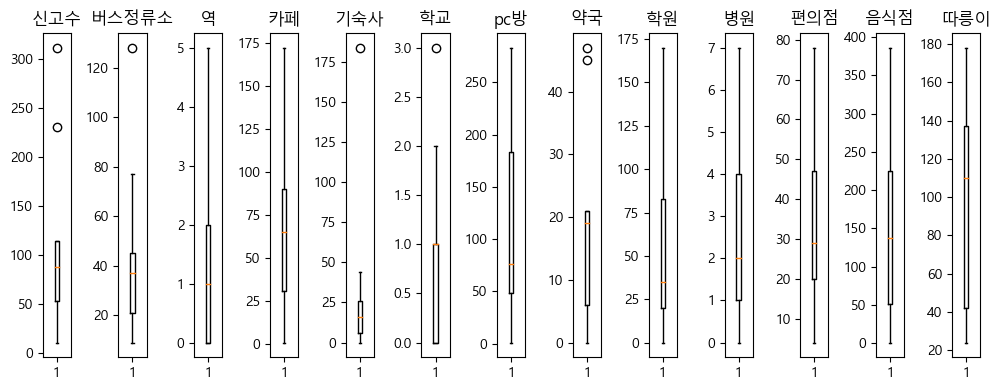

In [10]:
#boxplot 을 통해 변수들 확인 
fig, axes = plt.subplots(nrows=1, ncols=len(df1.columns), figsize=(10, 4))
for i, column in enumerate(df1):
    axes[i].boxplot(df1[column])
    axes[i].set_title(column)  # subplot의 제목 설정

# 그래프 출력
plt.tight_layout()
plt.show()

C:\Users\tpdus\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


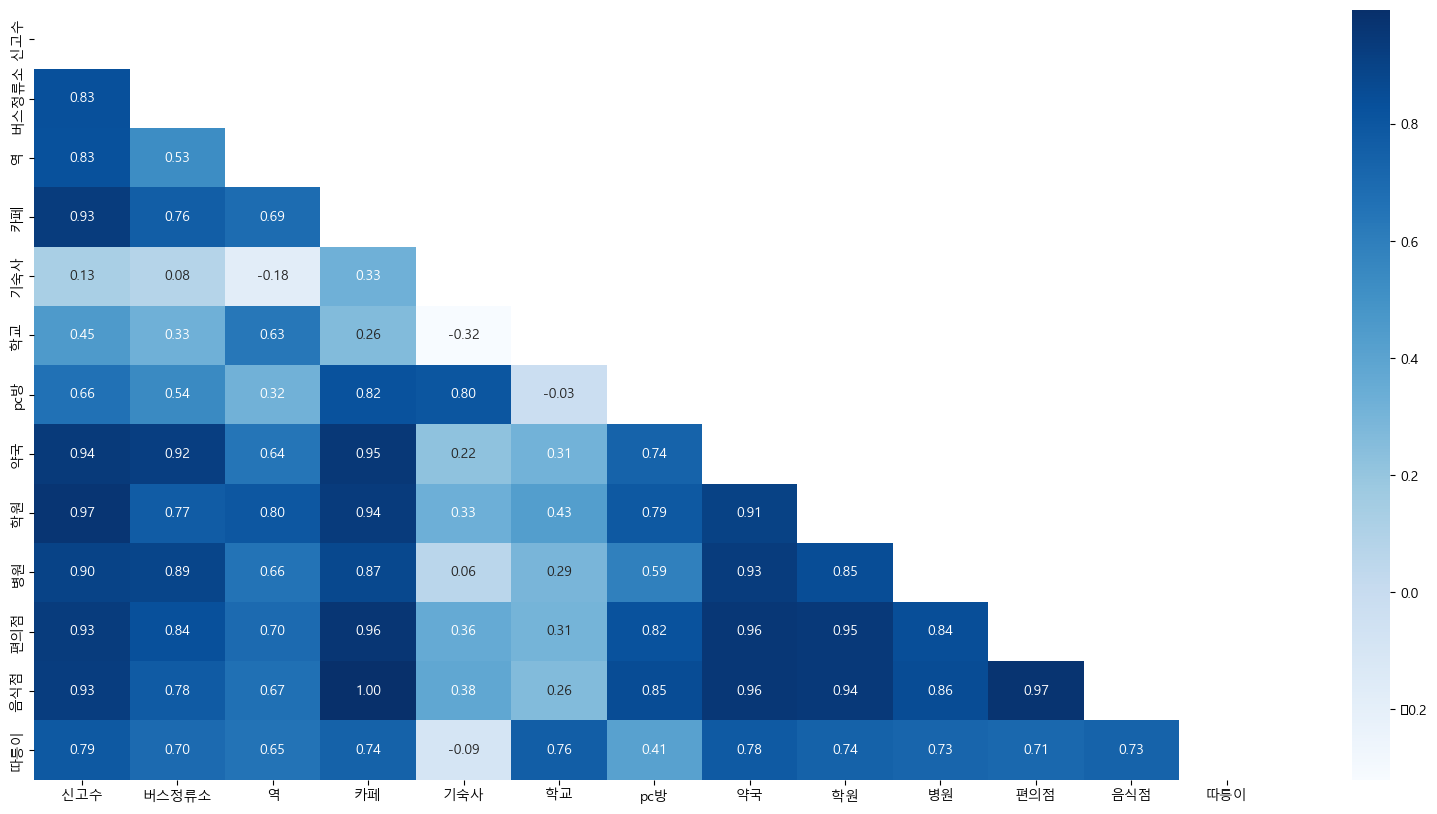

In [11]:
# 변수간의 상관관계를 분석후 변수 필터링
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = df1.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Blues')


In [12]:
# 견인수와 상관관계가 0.7이하인 변수들 (기숙사,학교,pc방) 제외 
df1=df1.drop('기숙사',axis =1)
df1=df1.drop('학교',axis =1)
df1=df1.drop('pc방',axis =1)

In [13]:
df1

,신고수,버스정류소,역,카페,약국,학원,병원,편의점,음식점,따릉이
0,53,21,0,6,4,10,1,4,9,30
1,100,33,0,90,21,83,2,47,225,65
2,35,17,1,31,6,20,2,20,51,24
3,230,128,2,121,47,117,7,72,291,135
4,80,45,0,66,21,31,4,22,137,137
5,11,9,1,1,0,0,0,5,1,42
6,311,77,5,172,45,170,7,78,386,178
7,114,45,2,36,14,69,2,29,88,143
8,88,37,1,65,19,35,1,38,152,110


## 전처리

Text(0, 0.5, 'Feature magnitude')

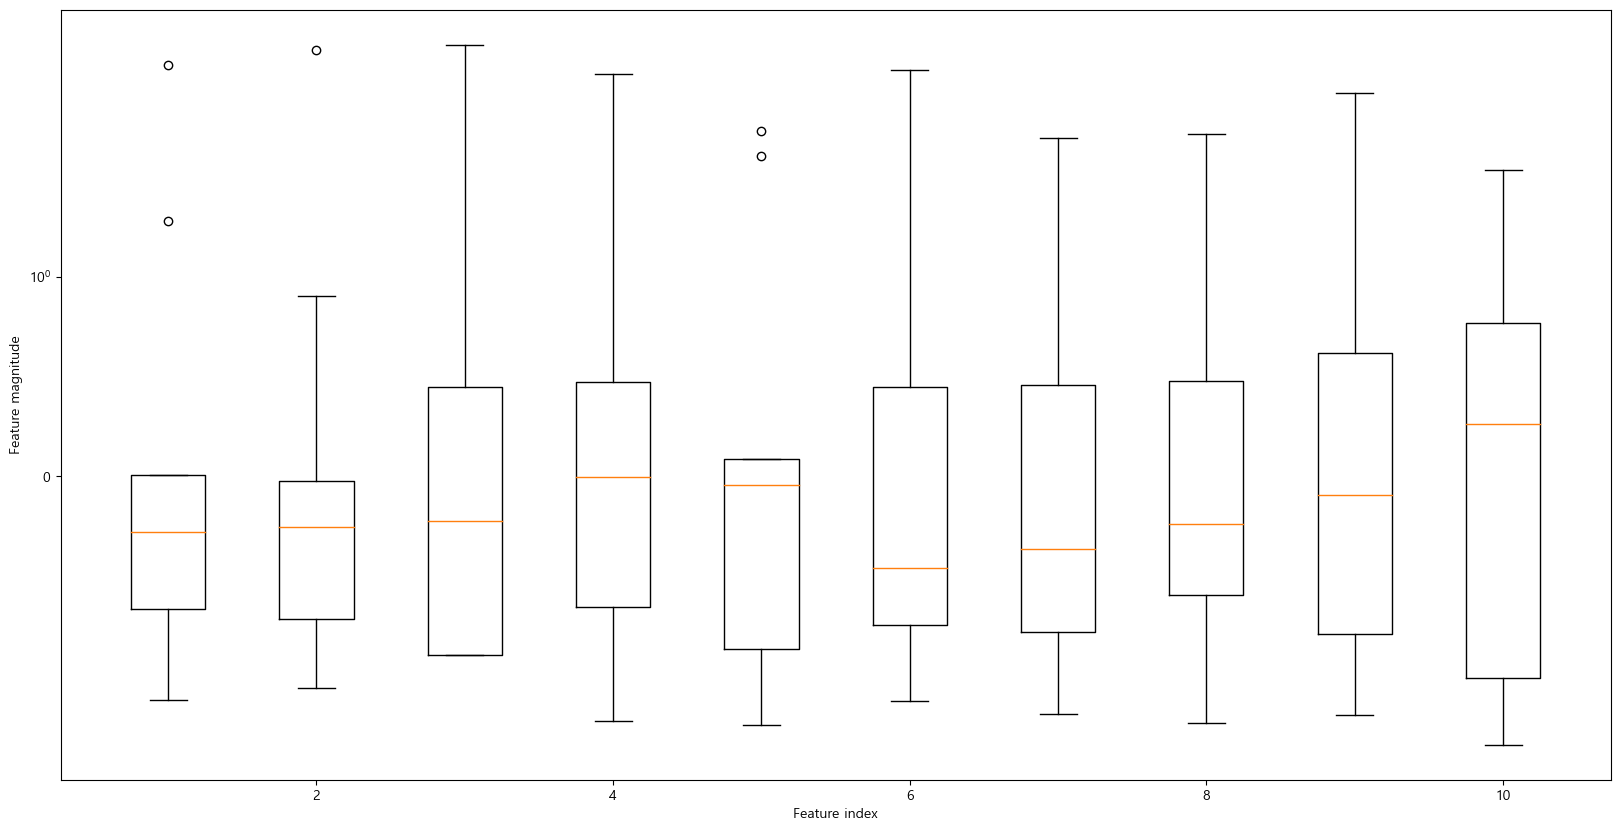

In [14]:
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

plt.boxplot(df1_scaled,manage_ticks = False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

# Agglomerative

In [15]:
# 하이퍼파라미터 바꿔가며 진행 
linkage = ['ward', 'complete', 'average', 'single']
sil_scores = []
sil_scores_linkage = []

best_score=0
best_parmas={}
for link in linkage:
    sil_scores_n = []
    for n_cluster in range(2,6):
        agg = AgglomerativeClustering(n_clusters=n_cluster, linkage=link)
        cluster_labels = agg.fit_predict(df1_scaled)
        score=silhouette_score(df1_scaled, cluster_labels)
        sil_scores_n.append(score)
        
        
        if score > best_score:
            best_score=score
            best_params={'n_cluster':n_cluster, 'linkage':link}
    sil_scores.append(sil_scores_n)
    sil_scores_linkage.append(sil_scores)
   

print('best score:',best_score)
print(best_params)

print("sil_scores:", sil_scores)


print("sil_scores_linkage",sil_scores)

best score: 0.5821257921221217
{'n_cluster': 2, 'linkage': 'ward'}
sil_scores: [[0.5821257921221217, 0.464784226978624, 0.3711880781609675, 0.267051304967565], [0.5821257921221217, 0.464784226978624, 0.3711880781609675, 0.267051304967565], [0.5821257921221217, 0.42830161995105315, 0.3711880781609675, 0.267051304967565], [0.5821257921221217, 0.42830161995105315, 0.3711880781609675, 0.267051304967565]]
sil_scores_linkage [[0.5821257921221217, 0.464784226978624, 0.3711880781609675, 0.267051304967565], [0.5821257921221217, 0.464784226978624, 0.3711880781609675, 0.267051304967565], [0.5821257921221217, 0.42830161995105315, 0.3711880781609675, 0.267051304967565], [0.5821257921221217, 0.42830161995105315, 0.3711880781609675, 0.267051304967565]]


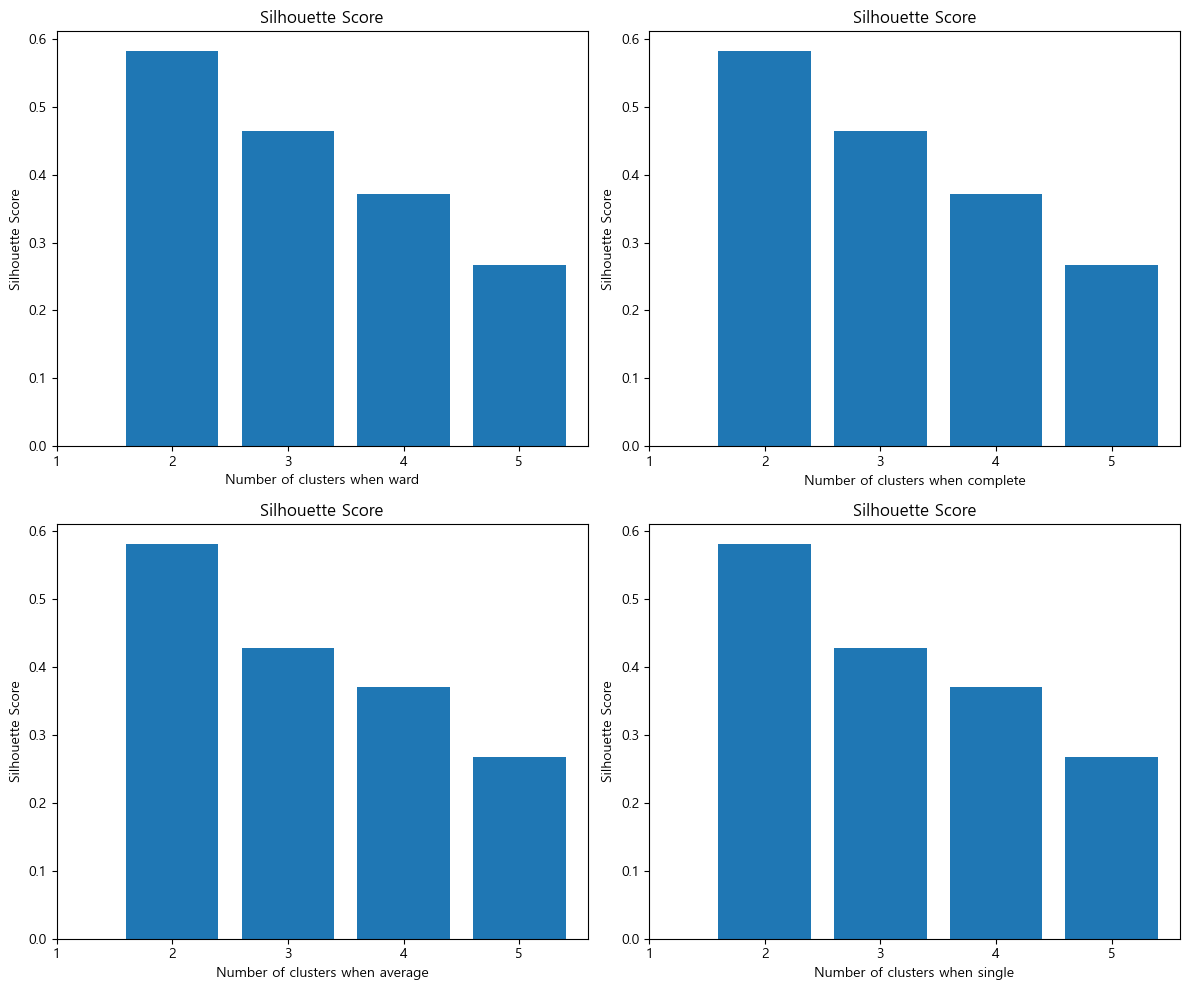

In [16]:
plt.figure(figsize=(12, 10))
for n in range(len(linkage)):
    plt.subplot(2, 2, n + 1)
    plt.bar(range(2, 6), sil_scores[n])
    plt.xlabel("Number of clusters when " + linkage[n])
    plt.ylabel("Silhouette Score")
    plt.xticks(range(1, 6))
    plt.title("Silhouette Score")
plt.tight_layout()
plt.show()


In [17]:
# 최적의 하이퍼파라미터 선정후 모델 피팅
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels=agg.fit_predict(df1_scaled)

In [43]:

# 각 행의 클러스터 레이블 출력
for i, label in enumerate(agg_labels):
    print("행", i+1, "은(는) 클러스터", label+1, "에 속합니다.")

행 1 은(는) 클러스터 3 에 속합니다.
행 2 은(는) 클러스터 2 에 속합니다.
행 3 은(는) 클러스터 3 에 속합니다.
행 4 은(는) 클러스터 1 에 속합니다.
행 5 은(는) 클러스터 2 에 속합니다.
행 6 은(는) 클러스터 3 에 속합니다.
행 7 은(는) 클러스터 1 에 속합니다.
행 8 은(는) 클러스터 2 에 속합니다.
행 9 은(는) 클러스터 2 에 속합니다.


In [19]:
# 실루엣 스코어 = 0.46
silhouette_score(df1_scaled,agg_labels)

0.464784226978624

# DBSCAN

C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


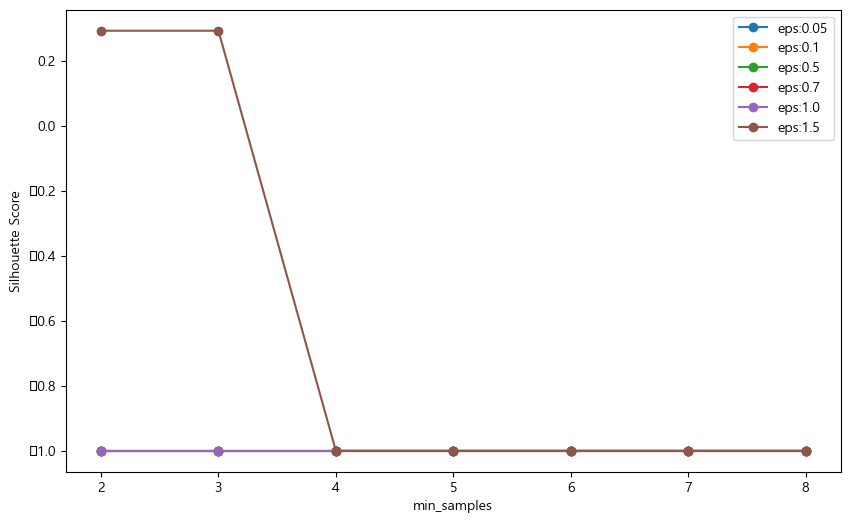

Best Silhouette Score: 0.29318524498324416
Best Parameters: {'eps': 1.5, 'min_samples': 2}
sil scores: [[-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [0.29318524498324416, 0.29318524498324416, -1, -1, -1, -1, -1]]


In [20]:
# 하이퍼파라미터 조정하면서 진행
eps_list = [0.05, 0.1, 0.5, 0.7, 1.0,1.5]
min_samples_list = [2,3,4,5,6,7,8]

# 계산한 silhouette score를 저장할 리스트
sil_scores = []
best_score=0
best_params={}
# eps와 min_samples를 바꿔가며 silhouette score 계산
for eps in eps_list:
    sil_scores_n=[]
    for min_samples in min_samples_list:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(df1_scaled)
        if len(set(cluster_labels)) > 1:
            cluster_labels[cluster_labels == -1] = len(set(cluster_labels))
            score = silhouette_score(df1_scaled, cluster_labels)
            
            sil_scores_n.append(score)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples':min_samples}
        else:
            sil_scores_n.append(-1)  # 클러스터가 하나 이하인 경우는 silhouette score를 -1로 처리
    sil_scores.append(sil_scores_n)

# 계산한 silhouette score로 elbow point 그래프 그리기
scores_2d = np.array(sil_scores).reshape(len(eps_list), len(min_samples_list))
plt.figure(figsize=(10, 6))
for i, eps in enumerate(eps_list):
    plt.plot(min_samples_list, scores_2d[i], 'o-', label='eps: {}'.format(eps))
plt.xticks(min_samples_list)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.legend(['eps:{}'.format(eps) for eps in eps_list])
plt.show()

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)
print("sil scores:", sil_scores)

In [45]:
# 최적의 하이퍼 파라미터 선정후 모델 피팅 
db = DBSCAN(eps=1.5, min_samples=2)
cluster_labels2 = db.fit_predict(df1_scaled)

# 클러스터 레이블 출력
print("Cluster Labels:")
print(cluster_labels2)
# clustering이 되지 않음

Cluster Labels:
[ 0 -1  0 -1 -1  0 -1 -1 -1]


In [46]:

# 각 행의 클러스터 레이블 출력
for i, label in enumerate(cluster_labels2):
    print("행", i+1, "은(는) 클러스터", label+1, "에 속합니다.")

행 1 은(는) 클러스터 1 에 속합니다.
행 2 은(는) 클러스터 0 에 속합니다.
행 3 은(는) 클러스터 1 에 속합니다.
행 4 은(는) 클러스터 0 에 속합니다.
행 5 은(는) 클러스터 0 에 속합니다.
행 6 은(는) 클러스터 1 에 속합니다.
행 7 은(는) 클러스터 0 에 속합니다.
행 8 은(는) 클러스터 0 에 속합니다.
행 9 은(는) 클러스터 0 에 속합니다.


# k-means


In [49]:
# 하이퍼 파라미터 바꿔가면서 진행
sil_scores = []
inertia = []
best_score=0
algorithm=['elkan','auto','full']
best_params={}
inertia1 = []
for algo in algorithm:
    sil_scores_n = []
   
    for n_clusters in range(2,5):
        kmeans = KMeans(n_clusters=n_clusters, algorithm= algo, random_state=0)
        cluster_labels = kmeans.fit_predict(df1_scaled)
        score = silhouette_score(df1_scaled, cluster_labels)
        sil_scores_n.append(score)
        
        
        
        if score > best_score:
            best_score = score
            best_params = {'n_cluster': n_clusters, '알고리즘': algo}
    sil_scores.append(sil_scores_n)
    inertia.append(kmeans.inertia_)
        

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)


print("sil_scores:",sil_scores)

C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Best Silhouette Score: 0.5821257921221217
Best Parameters: {'n_cluster': 2, '알고리즘': 'elkan'}
sil_scores: [[0.5821257921221217, 0.464784226978624, 0.3711880781609675], [0.5821257921221217, 0.464784226978624, 0.3711880781609675], [0.5821257921221217, 0.464784226978624, 0.3711880781609675]]


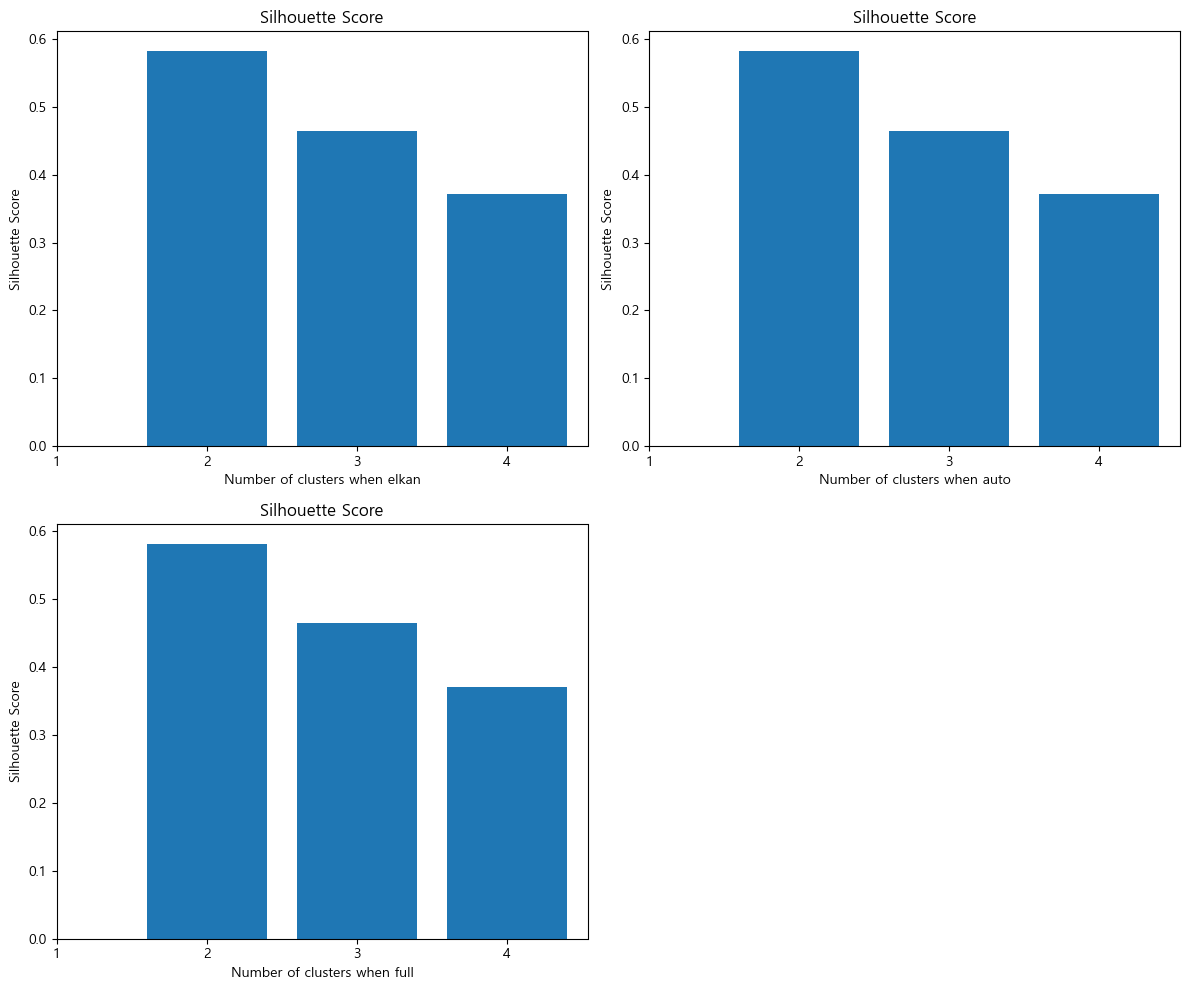

In [50]:
# 하이퍼 파라미터 별 실루엣 스코어 시각화
plt.figure(figsize=(12, 10))
for n in range(len(algorithm)):
    plt.subplot(2, 2, n + 1)
    plt.bar(range(2, 5), sil_scores[n])
    plt.xlabel("Number of clusters when " + algorithm[n])
    plt.ylabel("Silhouette Score")
    plt.xticks(range(1, 5))
    plt.title("Silhouette Score")
plt.tight_layout()
plt.show()

In [84]:
# 클러스터링 진행
n_clusters = 3
kmeans =KMeans(n_clusters = n_clusters, algorithm= 'elkan')
kmeans.fit(df1_scaled)

assignments_df1_scaled = kmeans.labels_
print(assignments_df1_scaled)

[0 2 0 1 2 0 1 2 2]


In [85]:
print(kmeans.cluster_centers_)

[[-0.88325356 -0.87037984 -0.4472136  -1.00362481 -1.03439081 -0.93585751
  -0.77919372 -1.01001694 -1.0416164  -1.19654622]
 [ 1.72082158  1.63959007  1.45344419  1.54672557  1.66769131  1.59095777
   1.69589222  1.5947636   1.53631667  1.1311101 ]
 [-0.19797062 -0.16701015 -0.3913119  -0.02064418 -0.05805255 -0.09358575
  -0.26355082 -0.03986909  0.01305397  0.33185462]]


In [86]:
# 실루엣 스코어 = 0.464
silhouette_score(df1_scaled,assignments_df1_scaled)

0.464784226978624

In [87]:
# 각 행의 클러스터 레이블 출력
for i, label in enumerate(assignments_df1_scaled):
    print("행", i+1, "은(는) 클러스터", label+1, "에 속합니다.")

행 1 은(는) 클러스터 1 에 속합니다.
행 2 은(는) 클러스터 3 에 속합니다.
행 3 은(는) 클러스터 1 에 속합니다.
행 4 은(는) 클러스터 2 에 속합니다.
행 5 은(는) 클러스터 3 에 속합니다.
행 6 은(는) 클러스터 1 에 속합니다.
행 7 은(는) 클러스터 2 에 속합니다.
행 8 은(는) 클러스터 3 에 속합니다.
행 9 은(는) 클러스터 3 에 속합니다.


#### kmeans  clustering 이 가장 성능이 좋다고 판단하여 kmeans 선택

# 결과

best clustering: k-means  n_clusters=3, algorithm= elkan

In [55]:
data_features=df1.columns
data_with_labels = pd.DataFrame(df1, columns=data_features)
data_with_labels['Cluster'] = assignments_df1_scaled

cluster_features = data_with_labels.groupby('Cluster')[data_features].mean()

# 클러스터별 특징 출력
for cluster_id, features in cluster_features.iterrows():
    print(f"Cluster {cluster_id}:")
    for feature, value in features.iteritems():
        print(f"- {feature}: {value}")

Cluster 0:
- 신고수: 33.0
- 버스정류소: 15.666666666666666
- 역: 0.6666666666666666
- 카페: 12.666666666666666
- 약국: 3.3333333333333335
- 학원: 10.0
- 병원: 1.0
- 편의점: 9.666666666666666
- 음식점: 20.333333333333332
- 따릉이: 32.0
- Cluster: 0.0
Cluster 1:
- 신고수: 270.5
- 버스정류소: 102.5
- 역: 3.5
- 카페: 146.5
- 약국: 46.0
- 학원: 143.5
- 병원: 7.0
- 편의점: 75.0
- 음식점: 338.5
- 따릉이: 156.5
- Cluster: 1.0
Cluster 2:
- 신고수: 95.5
- 버스정류소: 40.0
- 역: 0.75
- 카페: 64.25
- 약국: 18.75
- 학원: 54.5
- 병원: 2.25
- 편의점: 34.0
- 음식점: 150.5
- 따릉이: 113.75
- Cluster: 2.0


Index(['신고수', '버스정류소', '역', '카페', '약국', '학원', '병원', '편의점', '음식점', '따릉이',
       'Cluster'],
      dtype='object')


C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


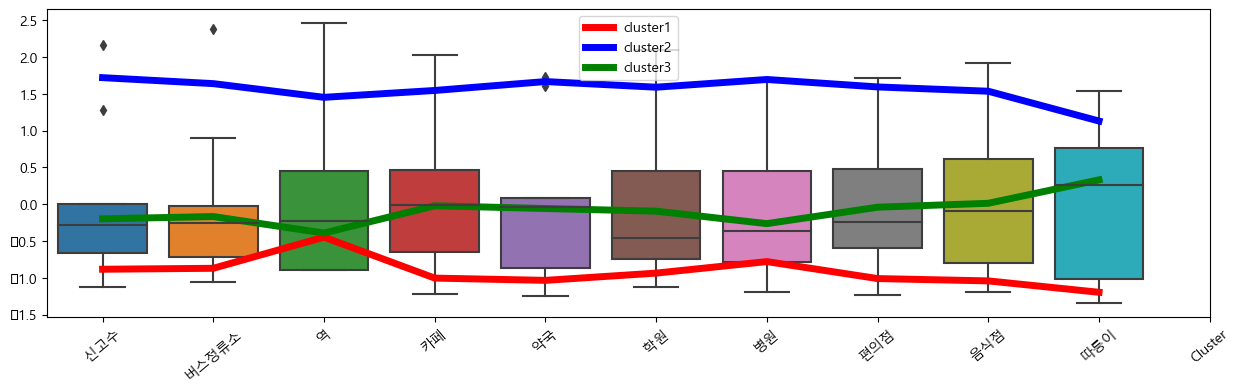

In [56]:
#클러스터별 특징 시각화
plt.figure(figsize = (15,4))
sns.boxplot(data = df1_scaled)
pd.Series(kmeans.cluster_centers_[0]).plot(color = 'red',linewidth='5',label = 'cluster1')
pd.Series(kmeans.cluster_centers_[1]).plot(color = 'blue',linewidth='5',label = 'cluster2')
pd.Series(kmeans.cluster_centers_[2]).plot(color = 'green',linewidth='5',label = 'cluster3')




feature_names=df1.columns
print(feature_names)

plt.xticks(np.arange(0, len(feature_names)),feature_names,rotation = 40)
plt.legend(loc = 'upper center')




plt.show()

# 결론

 #### 클러스터 특징

클러스터 1 : 지하철 역, 병원많음

클러스터 2 : 학원, 음식점 많음

클러스터 3 : 특징 없음

- 클러스터별 동분류

클러스터 1 : 본동, 상도 1동, 동작동

클러스터 2 : 상도동, 사당동

클러스터 3 : 노량진동, 흑석동,대방동, 신대방

# 영등포구

# EDA

In [57]:
# 동별로 데이터 가져와서 저장
df2 = pd.read_csv('C:/Users/tpdus/OneDrive/바탕 화면/팀프로젝트/데이터마이닝/진짜완료데이터/영등포구_동단위.csv',encoding='cp949')

df2

,동,견인수,정류소,역,카페,학교,기숙사,pc방,약국,학원,숙박업,병원,편의점,음식점,양식,일식,중식,한식,따릉이 대여소
0,당산동,38,11,1,12,0,2,0,0,10,2,0,12,36,12,3,3,13,23
1,당산동 1가,37,4,0,30,0,2,0,5,16,20,2,13,153,16,3,2,60,15
2,당산동 2가,46,9,0,14,0,1,1,1,7,5,0,4,83,6,2,3,41,15
3,당산동 3가,119,8,2,56,0,3,2,4,55,6,6,18,341,24,14,16,110,35
4,당산동 4가,44,6,0,35,0,3,0,5,33,3,4,8,136,12,8,10,48,76
5,당산동 5가,98,19,0,12,0,0,0,5,51,2,12,8,88,10,2,3,24,25
6,당산동 6가,119,5,0,14,0,5,1,9,24,8,15,13,126,17,3,6,59,6
7,대림동,439,63,1,76,0,8,15,42,62,25,33,58,913,14,7,236,279,114
8,도림동,78,24,2,53,0,8,4,17,23,9,1,13,142,14,1,13,53,47
9,문래동 1가,7,3,0,6,0,0,0,0,7,0,1,2,30,4,1,1,16,0


In [58]:
# 동이름은 사용하지 않기 때문에 제거
df2 = df2.iloc[:,1:]
df2

,견인수,정류소,역,카페,학교,기숙사,pc방,약국,학원,숙박업,병원,편의점,음식점,양식,일식,중식,한식,따릉이 대여소
0,38,11,1,12,0,2,0,0,10,2,0,12,36,12,3,3,13,23
1,37,4,0,30,0,2,0,5,16,20,2,13,153,16,3,2,60,15
2,46,9,0,14,0,1,1,1,7,5,0,4,83,6,2,3,41,15
3,119,8,2,56,0,3,2,4,55,6,6,18,341,24,14,16,110,35
4,44,6,0,35,0,3,0,5,33,3,4,8,136,12,8,10,48,76
5,98,19,0,12,0,0,0,5,51,2,12,8,88,10,2,3,24,25
6,119,5,0,14,0,5,1,9,24,8,15,13,126,17,3,6,59,6
7,439,63,1,76,0,8,15,42,62,25,33,58,913,14,7,236,279,114
8,78,24,2,53,0,8,4,17,23,9,1,13,142,14,1,13,53,47
9,7,3,0,6,0,0,0,0,7,0,1,2,30,4,1,1,16,0


In [59]:
# 데이터 크기
df2.shape

(33, 18)

In [60]:
#피처 이름 
df2.columns.tolist()

['견인수',
 '정류소',
 '역',
 '카페',
 '학교',
 '기숙사',
 'pc방',
 '약국',
 '학원',
 '숙박업',
 '병원',
 '편의점',
 '음식점',
 '양식',
 '일식',
 '중식',
 '한식',
 '따릉이 대여소']

In [61]:
# 데이터 유형
type(df2)

pandas.core.frame.DataFrame

C:\Users\tpdus\AppData\Local\Temp\ipykernel_11184\1852229262.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


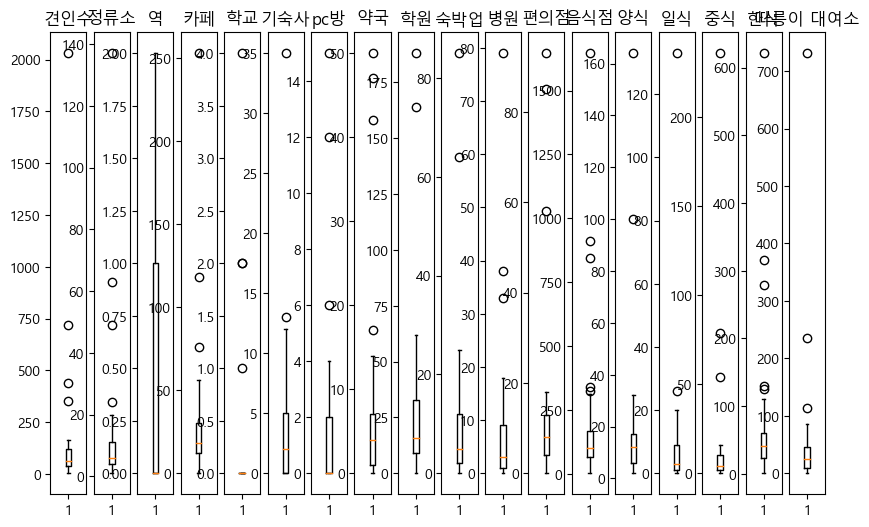

In [62]:
#boxplot 을 통해 변수들 확인 
fig, axes = plt.subplots(nrows=1, ncols=len(df2.columns), figsize=(10, 6))
for i, column in enumerate(df2):
    axes[i].boxplot(df2[column])
    axes[i].set_title(column)  # subplot의 제목 설정

# 그래프 출력
plt.tight_layout()
plt.show()

In [63]:
# 동이름은 사용하지 않기 때문에 제거
# 견인수가 이상치를 보여서 효과적인 분석을 위해 7,15,23 행 제거
df2 = df2.iloc[:,1:]
df2 = df2.drop(df2.index[[7, 15, 23]])
df2

,정류소,역,카페,학교,기숙사,pc방,약국,학원,숙박업,병원,편의점,음식점,양식,일식,중식,한식,따릉이 대여소
0,11,1,12,0,2,0,0,10,2,0,12,36,12,3,3,13,23
1,4,0,30,0,2,0,5,16,20,2,13,153,16,3,2,60,15
2,9,0,14,0,1,1,1,7,5,0,4,83,6,2,3,41,15
3,8,2,56,0,3,2,4,55,6,6,18,341,24,14,16,110,35
4,6,0,35,0,3,0,5,33,3,4,8,136,12,8,10,48,76
5,19,0,12,0,0,0,5,51,2,12,8,88,10,2,3,24,25
6,5,0,14,0,5,1,9,24,8,15,13,126,17,3,6,59,6
8,24,2,53,0,8,4,17,23,9,1,13,142,14,1,13,53,47
9,3,0,6,0,0,0,0,7,0,1,2,30,4,1,1,16,0
10,3,0,23,0,0,0,1,18,1,0,3,121,12,7,3,32,0


<AxesSubplot:>

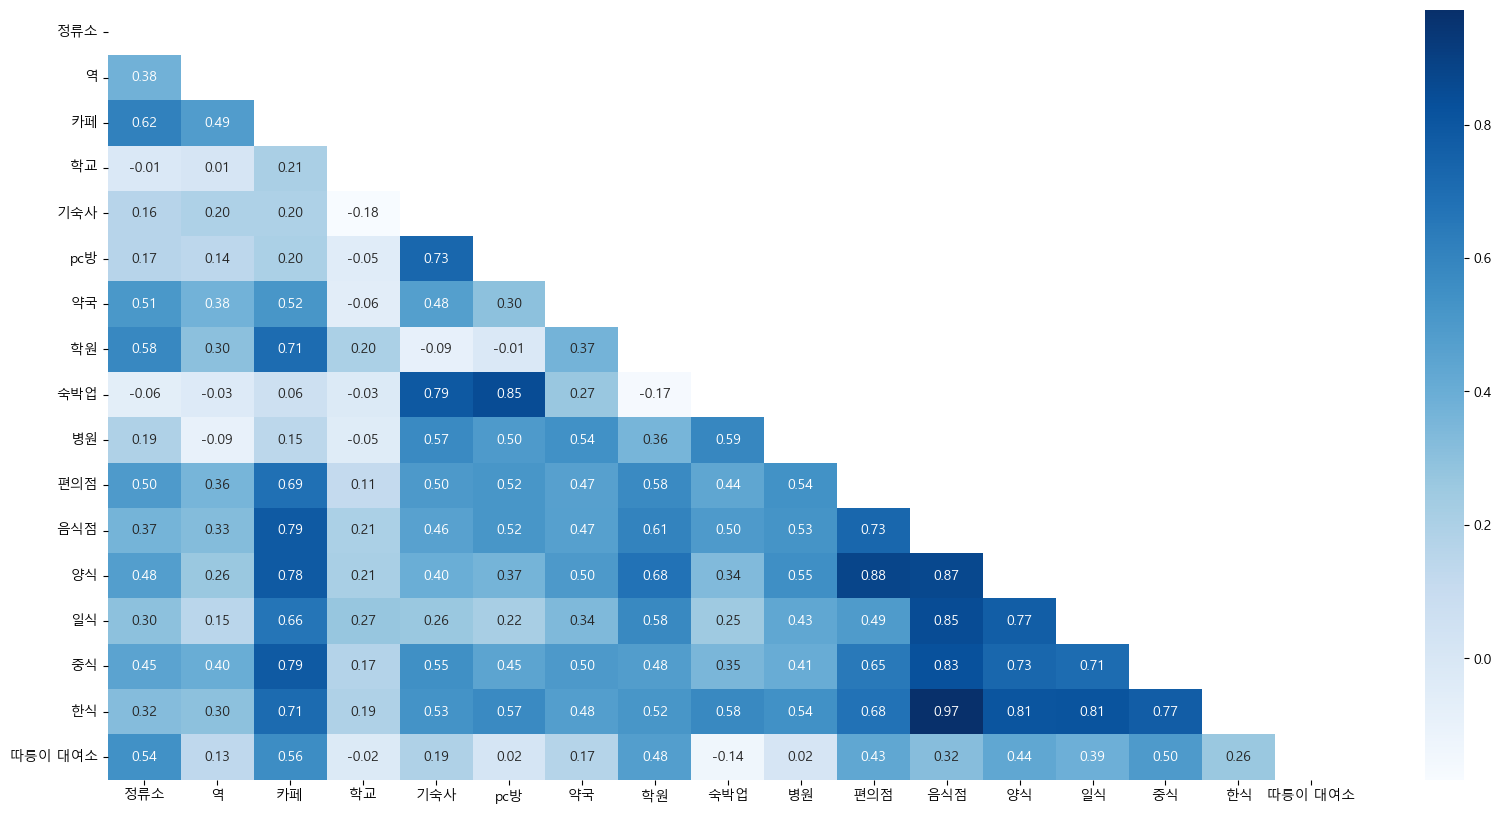

In [64]:
# 변수간의 상관관계 확인 후 변수 필터링
# 상관관계 확인하기
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True
plt.rcParams["figure.figsize"] = (20,10)
sns.heatmap(data = df2.corr(), mask=mask, annot=True, fmt = '.2f', linewidths=0, cmap='Blues')

In [65]:
# 역, 기숙사,학교, pc방, 숙박업, 약국 , 병원, 중식 제외
df2=df2.drop('정류소',axis =1)
df2=df2.drop('역',axis =1)
df2=df2.drop('기숙사',axis =1)
df2=df2.drop('pc방',axis =1)
df2=df2.drop('숙박업',axis =1)
df2=df2.drop('중식',axis =1)
df2=df2.drop('학교',axis =1)
df2=df2.drop('약국',axis =1)
df2=df2.drop('병원',axis =1)
df2

,카페,학원,편의점,음식점,양식,일식,한식,따릉이 대여소
0,12,10,12,36,12,3,13,23
1,30,16,13,153,16,3,60,15
2,14,7,4,83,6,2,41,15
3,56,55,18,341,24,14,110,35
4,35,33,8,136,12,8,48,76
5,12,51,8,88,10,2,24,25
6,14,24,13,126,17,3,59,6
8,53,23,13,142,14,1,53,47
9,6,7,2,30,4,1,16,0
10,23,18,3,121,12,7,32,0


Text(0, 0.5, 'Feature magnitude')

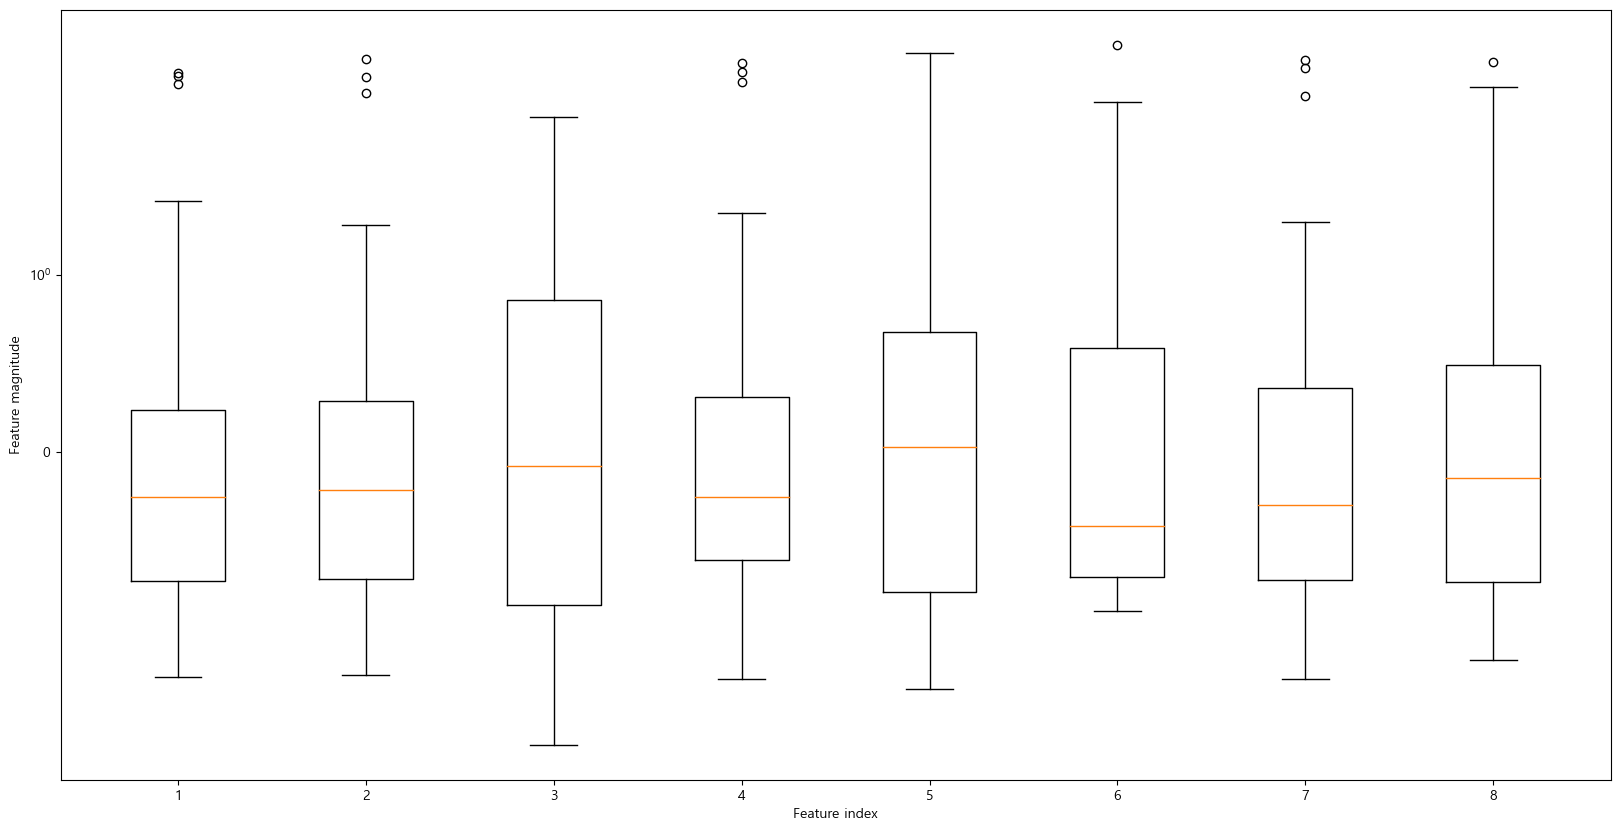

In [66]:
#전처리
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2)

plt.boxplot(df2_scaled,manage_ticks = False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

# DBSCAN

C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


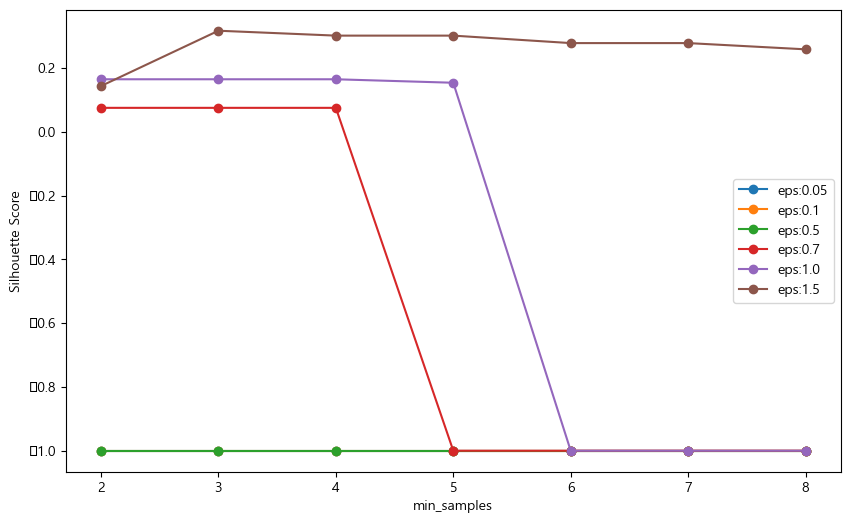

Best Silhouette Score: 0.3169944502336858
Best Parameters: {'eps': 1.5, 'min_samples': 3}
sil scores: [[-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [-1, -1, -1, -1, -1, -1, -1], [0.07516316994895447, 0.07516316994895447, 0.07516316994895447, -1, -1, -1, -1], [0.16475785324455694, 0.16475785324455694, 0.16475785324455694, 0.15385192627319416, -1, -1, -1], [0.14355545110849952, 0.3169944502336858, 0.301629397110968, 0.301629397110968, 0.27820049907176353, 0.27820049907176353, 0.2586439707929033]]


In [67]:
# 하이퍼파라미터 바꿔가면서 진행
eps_list = [0.05, 0.1, 0.5, 0.7, 1.0,1.5]
min_samples_list = [2,3,4,5,6,7,8]

# 계산한 silhouette score를 저장할 리스트
sil_scores = []
best_score=0
best_params={}
# eps와 min_samples를 바꿔가며 silhouette score 계산
for eps in eps_list:
    sil_scores_n=[]
    for min_samples in min_samples_list:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = db.fit_predict(df2_scaled)
        if len(set(cluster_labels)) > 1:
            cluster_labels[cluster_labels == -1] = len(set(cluster_labels))
            score = silhouette_score(df2_scaled, cluster_labels)
            
            sil_scores_n.append(score)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples':min_samples}
        else:
            sil_scores_n.append(-1)  # 클러스터가 하나 이하인 경우는 silhouette score를 -1로 처리
    sil_scores.append(sil_scores_n)

# 계산한 silhouette score로 elbow point 그래프 그리기
scores_2d = np.array(sil_scores).reshape(len(eps_list), len(min_samples_list))
plt.figure(figsize=(10, 6))
for i, eps in enumerate(eps_list):
    plt.plot(min_samples_list, scores_2d[i], 'o-', label='eps: {}'.format(eps))
plt.xticks(min_samples_list)
plt.xlabel('min_samples')
plt.ylabel('Silhouette Score')
plt.legend(['eps:{}'.format(eps) for eps in eps_list])
plt.show()

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)
print("sil scores:", sil_scores)

In [69]:
# 최적의 하이퍼파라미터 선정후 모델 피팅
db = DBSCAN(eps=1.5, min_samples=2)
cluster_labels = db.fit_predict(df2_scaled)

# 클러스터 레이블 출력
print("Cluster Labels:")
print(cluster_labels)
# clustering이 되지 않음

Cluster Labels:
[ 0  1  0 -1 -1  0  1 -1  0 -1 -1  0  0  0 -1  0 -1 -1  0  0  0 -1  0  0
 -1 -1  0  0 -1  0]


# Agglomerative

In [70]:
#하이퍼파라미터 바꿔가면서 진행 
linkage = ['ward', 'complete', 'average', 'single']
sil_scores = []
sil_scores_linkage = []

best_score=0
best_parmas={}
for link in linkage:
    sil_scores_n = []
    for n_cluster in range(2,6):
        agg = AgglomerativeClustering(n_clusters=n_cluster, linkage=link)
        cluster_labels = agg.fit_predict(df2_scaled)
        score=silhouette_score(df2_scaled, cluster_labels)
        sil_scores_n.append(score)
        
        
        if score > best_score:
            best_score=score
            best_params={'n_cluster':n_cluster, 'linkage':link}
    sil_scores.append(sil_scores_n)
    sil_scores_linkage.append(sil_scores)
   

print('best score:',best_score)
print(best_params)

print("sil_scores:", sil_scores)


print("sil_scores_linkage",sil_scores)

best score: 0.4874683065441037
{'n_cluster': 2, 'linkage': 'average'}
sil_scores: [[0.45165837066595366, 0.29984705606890943, 0.2966875594484342, 0.27609192816776], [0.45165837066595366, 0.29984705606890943, 0.2966875594484342, 0.27609192816776], [0.4874683065441037, 0.4042124122740692, 0.3615521682666699, 0.3453357180376889], [0.30707006557415345, 0.4272786496983374, 0.31143830136156986, 0.22159637691142747]]
sil_scores_linkage [[0.45165837066595366, 0.29984705606890943, 0.2966875594484342, 0.27609192816776], [0.45165837066595366, 0.29984705606890943, 0.2966875594484342, 0.27609192816776], [0.4874683065441037, 0.4042124122740692, 0.3615521682666699, 0.3453357180376889], [0.30707006557415345, 0.4272786496983374, 0.31143830136156986, 0.22159637691142747]]


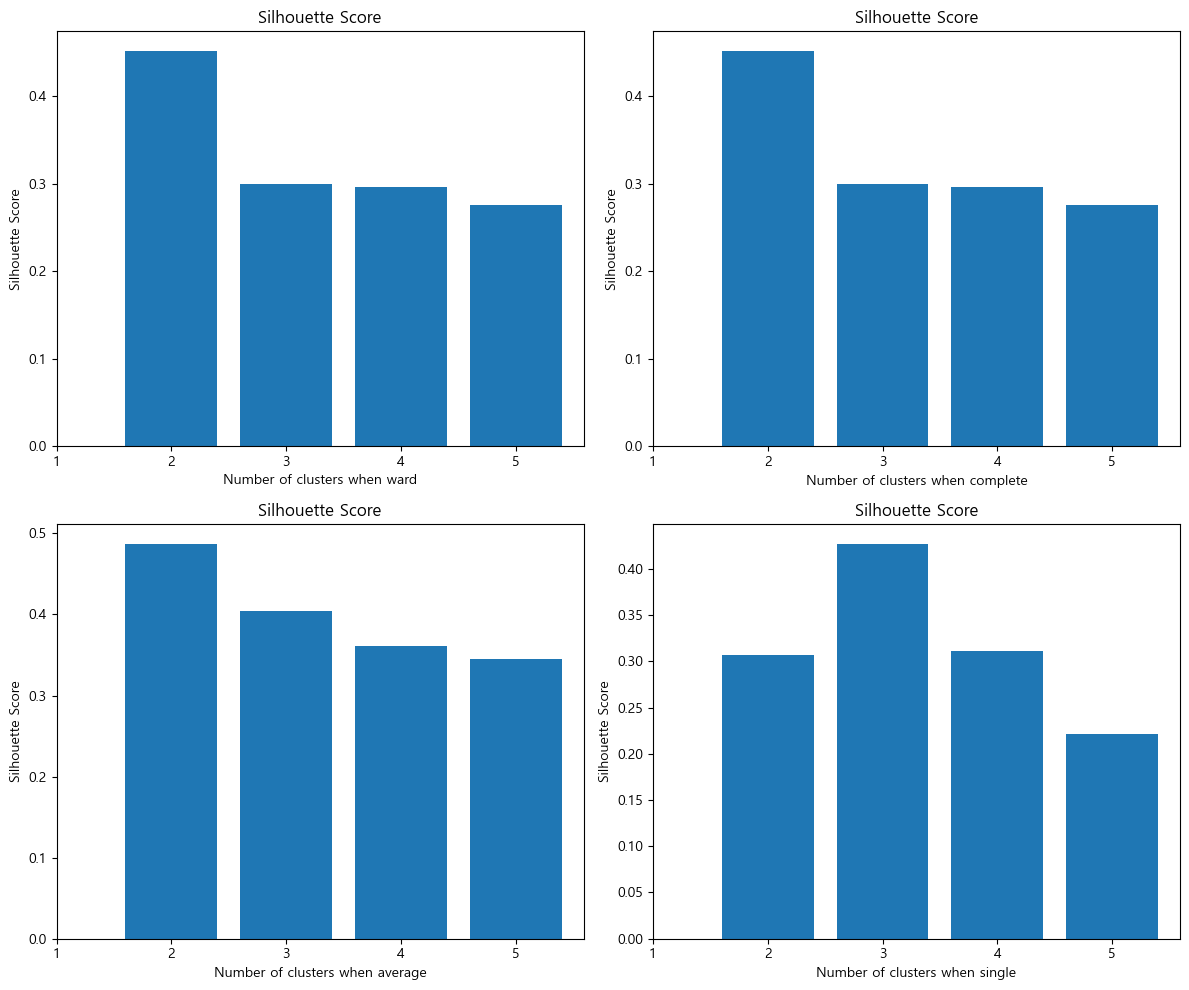

In [71]:
###### 하이퍼파라미터별 실루엣 스코어 시각화
plt.figure(figsize=(12, 10))
for n in range(len(linkage)):
    plt.subplot(2, 2, n + 1)
    plt.bar(range(2, 6), sil_scores[n])
    plt.xlabel("Number of clusters when " + linkage[n])
    plt.ylabel("Silhouette Score")
    plt.xticks(range(1, 6))
    plt.title("Silhouette Score")
plt.tight_layout()
plt.show()

- n=2 일때가 가장높지만 n=2 일땐 클러스터링을 제대로 수행하지 못한다고 판단하여 최적의 개수는 4개로 결정

In [72]:
agg = AgglomerativeClustering(n_clusters=4,linkage='single')
agg.fit(df2_scaled)

assignments_X_train = agg.labels_
print(assignments_X_train)

[0 0 0 2 1 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 1 0 0 3 0 0 0 0 0]


In [73]:
# 실루엣 스코어 = 0.38 클러스터링 성능이 좋지 못하다고 판단되어 기각
silhouette_score(df2_scaled,assignments_X_train)

0.31143830136156986

# k-means


In [74]:
# 하이퍼 파라미터 바꿔가면서 진행
sil_scores = []
inertia = []
best_score=0
algorithm=['elkan','auto','full']
best_params={}
inertia1 = []
for algo in algorithm:
    sil_scores_n = []
   
    for n_clusters in range(2,6):
        kmeans = KMeans(n_clusters=n_clusters, algorithm= algo, random_state=0)
        cluster_labels = kmeans.fit_predict(df2_scaled)
        score = silhouette_score(df2_scaled, cluster_labels)
        sil_scores_n.append(score)
        
        
        
        if score > best_score:
            best_score = score
            best_params = {'n_cluster': n_clusters, '알고리즘': algo}
    sil_scores.append(sil_scores_n)
    inertia.append(kmeans.inertia_)
        

print("Best Silhouette Score:", best_score)
print("Best Parameters:", best_params)


print("sil_scores:",sil_scores)


C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\tpdus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Window

Best Silhouette Score: 0.403543000608531
Best Parameters: {'n_cluster': 2, '알고리즘': 'elkan'}
sil_scores: [[0.403543000608531, 0.3165279988369783, 0.299239519530353, 0.2808630292848594], [0.403543000608531, 0.3165279988369783, 0.299239519530353, 0.2808630292848594], [0.403543000608531, 0.3165279988369783, 0.299239519530353, 0.2808630292848594]]


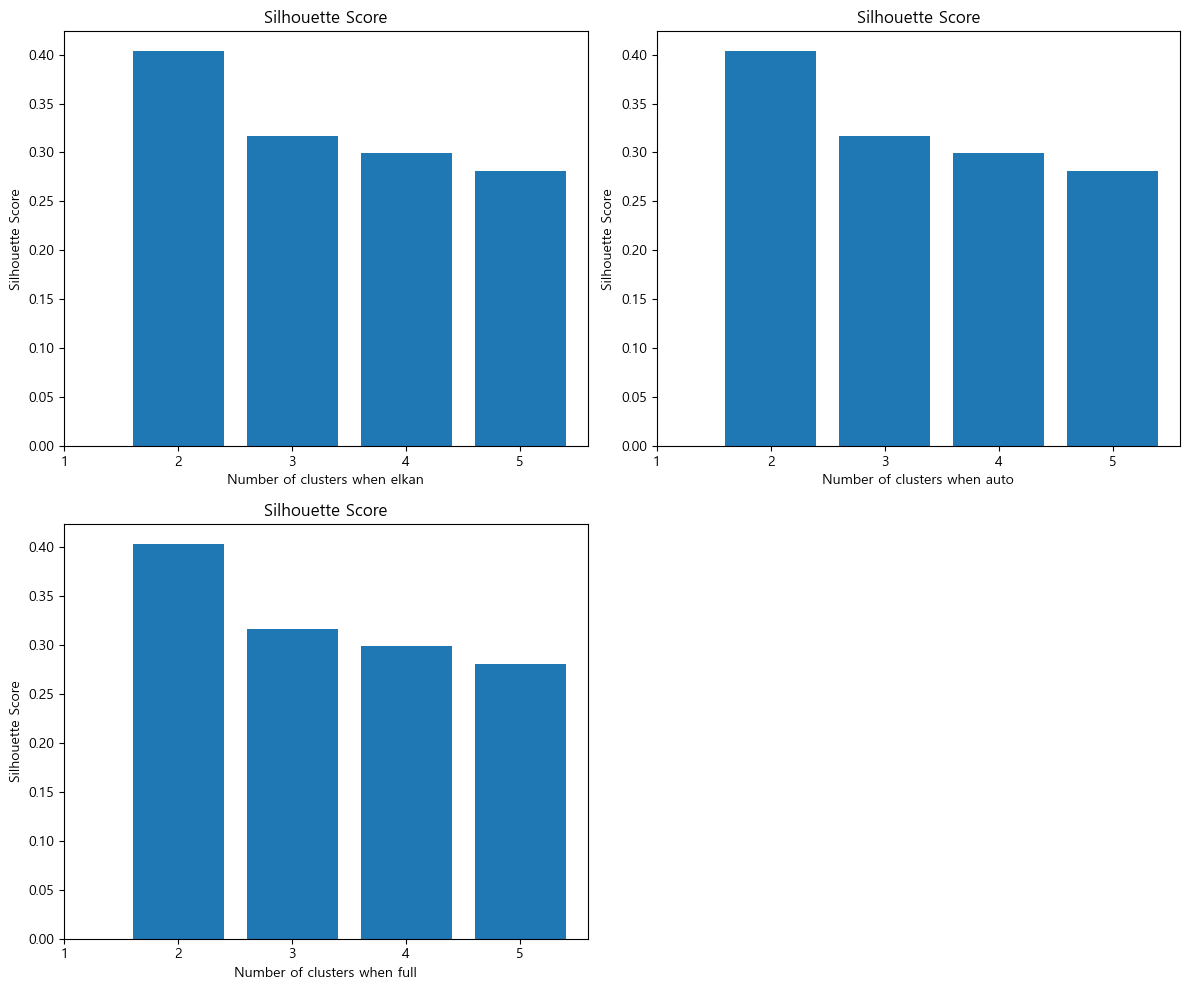

In [75]:
# 하이퍼 파라미터별 실루엣 스코어 시각화
plt.figure(figsize=(12, 10))
for n in range(len(algorithm)):
    plt.subplot(2, 2, n + 1)
    plt.bar(range(2, 6), sil_scores[n])
    plt.xlabel("Number of clusters when " + algorithm[n])
    plt.ylabel("Silhouette Score")
    plt.xticks(range(1, 6))
    plt.title("Silhouette Score")
plt.tight_layout()
plt.show()

#### 실루엣 스코어는 n=2 일때 가장 높지만 스코어와 클러스터링 된 결과를 봤을때 최적의 결과는 n=5 일때로 판단 

In [90]:
kmeans = KMeans(n_clusters=5,algorithm='elkan' ,random_state=0)
# kmeans.fit(df_scaled)
kmeans.fit(df2_scaled)

# assignments_df_scaled = kmeans.labels_
# print(assignments_df_scaled)
assignments_df2_scaled = kmeans.labels_
print(assignments_df2_scaled)


[3 3 1 4 2 3 3 2 1 3 4 1 1 3 3 3 2 0 3 1 1 2 1 1 0 0 1 1 3 3]


In [78]:
print(scaler.inverse_transform(kmeans.cluster_centers_))

[[ 26.33333333  21.          13.33333333 237.33333333  21.33333333
   13.          87.66666667  20.66666667]
 [  5.8          7.2          3.5         45.3          4.6
    1.1         22.7          9.6       ]
 [ 35.          26.          12.75       135.          15.25
    4.75        49.5         68.5       ]
 [ 17.63636364  20.54545455   8.36363636  97.18181818  11.54545455
    3.45454545  33.90909091  25.45454545]
 [ 55.5         57.5         17.         333.5         28.
   17.         120.          47.        ]]


In [79]:
# 각 행의 클러스터 레이블 출력
# for i, label in enumerate(assignments_df_scaled):
#     print("행", i+1, "은(는) 클러스터", label+1, "에 속합니다.")
for i, label in enumerate(assignments_df2_scaled):
    print("행", i+1, "은(는) 클러스터", label+1, "에 속합니다.")

행 1 은(는) 클러스터 4 에 속합니다.
행 2 은(는) 클러스터 4 에 속합니다.
행 3 은(는) 클러스터 2 에 속합니다.
행 4 은(는) 클러스터 5 에 속합니다.
행 5 은(는) 클러스터 3 에 속합니다.
행 6 은(는) 클러스터 4 에 속합니다.
행 7 은(는) 클러스터 4 에 속합니다.
행 8 은(는) 클러스터 3 에 속합니다.
행 9 은(는) 클러스터 2 에 속합니다.
행 10 은(는) 클러스터 4 에 속합니다.
행 11 은(는) 클러스터 5 에 속합니다.
행 12 은(는) 클러스터 2 에 속합니다.
행 13 은(는) 클러스터 2 에 속합니다.
행 14 은(는) 클러스터 4 에 속합니다.
행 15 은(는) 클러스터 4 에 속합니다.
행 16 은(는) 클러스터 4 에 속합니다.
행 17 은(는) 클러스터 3 에 속합니다.
행 18 은(는) 클러스터 1 에 속합니다.
행 19 은(는) 클러스터 4 에 속합니다.
행 20 은(는) 클러스터 2 에 속합니다.
행 21 은(는) 클러스터 2 에 속합니다.
행 22 은(는) 클러스터 3 에 속합니다.
행 23 은(는) 클러스터 2 에 속합니다.
행 24 은(는) 클러스터 2 에 속합니다.
행 25 은(는) 클러스터 1 에 속합니다.
행 26 은(는) 클러스터 1 에 속합니다.
행 27 은(는) 클러스터 2 에 속합니다.
행 28 은(는) 클러스터 2 에 속합니다.
행 29 은(는) 클러스터 4 에 속합니다.
행 30 은(는) 클러스터 4 에 속합니다.


In [80]:
#실루엣 스코어 = 0.285
silhouette_score(df2_scaled,assignments_df2_scaled)

0.2808630292848594

# 결과

best clustering: kmeans, n_clusters= 5, algorithm: elkan

In [81]:
data_features=df2.columns
data_with_labels = pd.DataFrame(df2, columns=data_features)
data_with_labels['Cluster'] = assignments_df2_scaled

cluster_features = data_with_labels.groupby('Cluster')[data_features].mean()

# 클러스터별 특징 출력
for cluster_id, features in cluster_features.iterrows():
    print(f"Cluster {cluster_id}:")
    for feature, value in features.iteritems():
        print(f"- {feature}: {value}")

Cluster 0:
- 카페: 26.333333333333332
- 학원: 21.0
- 편의점: 13.333333333333334
- 음식점: 237.33333333333334
- 양식: 21.333333333333332
- 일식: 13.0
- 한식: 87.66666666666667
- 따릉이 대여소: 20.666666666666668
Cluster 1:
- 카페: 5.8
- 학원: 7.2
- 편의점: 3.5
- 음식점: 45.3
- 양식: 4.6
- 일식: 1.1
- 한식: 22.7
- 따릉이 대여소: 9.6
Cluster 2:
- 카페: 35.0
- 학원: 26.0
- 편의점: 12.75
- 음식점: 135.0
- 양식: 15.25
- 일식: 4.75
- 한식: 49.5
- 따릉이 대여소: 68.5
Cluster 3:
- 카페: 17.636363636363637
- 학원: 20.545454545454547
- 편의점: 8.363636363636363
- 음식점: 97.18181818181819
- 양식: 11.545454545454545
- 일식: 3.4545454545454546
- 한식: 33.90909090909091
- 따릉이 대여소: 25.454545454545453
Cluster 4:
- 카페: 55.5
- 학원: 57.5
- 편의점: 17.0
- 음식점: 333.5
- 양식: 28.0
- 일식: 17.0
- 한식: 120.0
- 따릉이 대여소: 47.0


Index(['카페', '학원', '편의점', '음식점', '양식', '일식', '한식', '따릉이 대여소', 'Cluster'], dtype='object')


C:\Users\tpdus\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


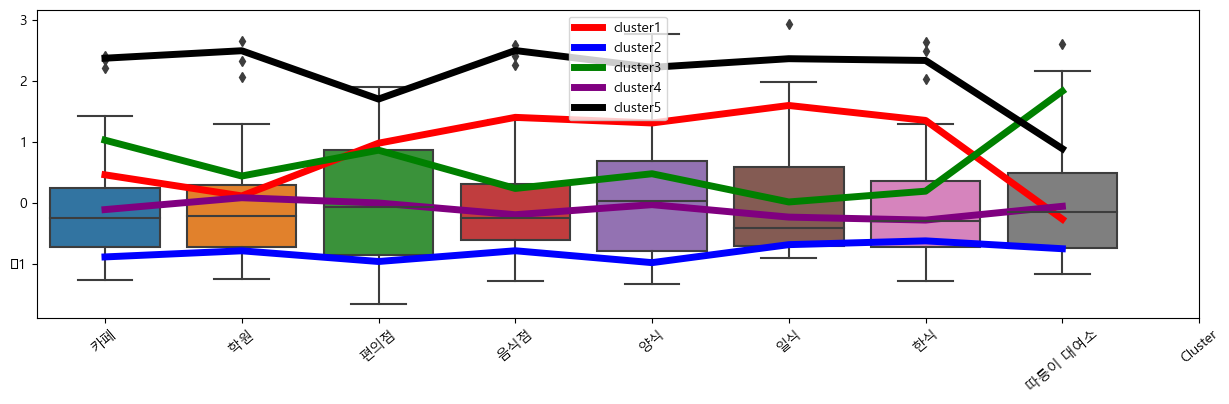

In [82]:
# 클러스터 별 특징 파악 
plt.figure(figsize = (15,4))
sns.boxplot(data = df2_scaled)
pd.Series(kmeans.cluster_centers_[0]).plot(color = 'red',linewidth='5',label = 'cluster1')
pd.Series(kmeans.cluster_centers_[1]).plot(color = 'blue',linewidth='5',label = 'cluster2')
pd.Series(kmeans.cluster_centers_[2]).plot(color = 'green',linewidth='5',label = 'cluster3')
pd.Series(kmeans.cluster_centers_[3]).plot(color = 'purple',linewidth='5',label = 'cluster4')
pd.Series(kmeans.cluster_centers_[4]).plot(color = 'black',linewidth='5',label = 'cluster5')

feature_names=df2.columns
print(feature_names)

plt.xticks(np.arange(0, len(feature_names)),feature_names,rotation = 40)
plt.legend(loc = 'upper center')

plt.show()

# 결론

클러스터 1 : 따릉이 대여소

클러스터 2 : 특징이 없는 것이 특징 -> 견인 위치에 따라서

클러스터 3 : 카페, 학원, 양식, 일식

클러스터 4 : 특징이 없는 것이 특징 -> 견인 위치에 따라서

클러스터 5 : 편의점, 음식점, 한식

- 클러스터별 동분류

클러스터 1 : 양평동 4가, 영등포동 3가, 영등포동 4가

클러스터 2 : 당산동 2가, 문래동 1가, 문래동 5가, 문래동 6가, 양평동 6가,
             양화동, 영등포동 1가, 영등포동 2가, 영등포동 6가, 영등포동 7가
            
클러스터 3 : 당산동 4가, 도림동, 양평동 3가, 영등포동

클러스터 4 : 당산동, 당산동 1가, 당산동 5가, 당산동 6가, 문래동 2가, 신길동, 
             양평동 1가, 양평동 2가, 양평동 5가, 영등포동 7가, 영등포동 8가
             
클러스터 5 : 당산동 3가, 문래동 4가